In [2]:
%reset
import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import dill
import sys, os
from astropy.io import fits
import scipy.interpolate as interpolate
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/cosmosis_code/')
os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis'
font = {'size': 18}
matplotlib.rc('font', **font)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]

import matplotlib
import matplotlib.pyplot as pl
font = {'size'   : 18}
matplotlib.rc('font', **font)
# # Latex stuff
pl.rc('text', usetex=True)
pl.rc('font', family='serif')


import pickle as pk
%load_ext autoreload
%autoreload 2




Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/theoryDV_obj_temp_kk_gty_theoryDV_Planck_cosmos_B12_OAGN_theorycov.fits')   

df.info()


Filename: /global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/theoryDV_obj_temp_kk_gty_theoryDV_Planck_cosmos_B12_OAGN_theorycov.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        17   (560, 560)   float64   
  2  xip           1 BinTableHDU     29   200R x 5C   [K, K, K, D, D]   
  3  xim           1 BinTableHDU     29   200R x 5C   [K, K, K, D, D]   
  4  compton_shear    1 BinTableHDU     29   80R x 5C   [K, K, K, D, D]   
  5  compton1_shear    1 BinTableHDU     29   80R x 5C   [K, K, K, D, D]   
  6  nz_source     1 BinTableHDU     24   300R x 7C   [D, D, D, D, D, D, D]   
  7  nz_lens       1 BinTableHDU     24   300R x 7C   [D, D, D, D, D, D, D]   


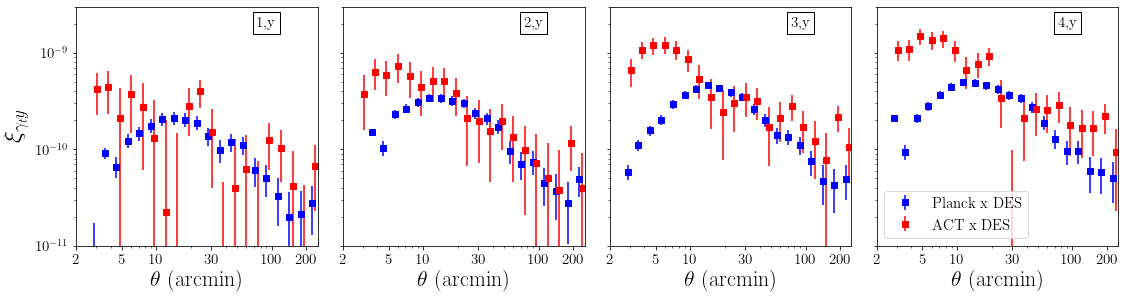

In [4]:
# from twobessel import *
# import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))
from astropy.io import fits
import pickle as pk
import numpy as np

# df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')

df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   


# desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(1,4, figsize = (16,4.5),sharex=True,sharey='row')
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(1):    
    for j2 in range(4):
                
        bin1y = df['compton_shear'].data['BIN1']
        bin2y = df['compton_shear'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]

        bin1y = df['compton1_shear'].data['BIN1']
        bin2y = df['compton1_shear'].data['BIN2']
        ind_sely1 = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]

           
        yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
        yk_val = df['compton_shear'].data['VALUE'][ind_sely]
        yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:480,400:480][ind_sely,:][:,ind_sely]))            

        yk_th_g1 = df['compton1_shear'].data['ANG'][ind_sely1]
        yk_val1 = df['compton1_shear'].data['VALUE'][ind_sely1]
        yk_err1 = np.sqrt(np.diag(df['COVMAT'].data[480:,480:][ind_sely1,:][:,ind_sely1]))            

        ax[j2].errorbar(yk_th_g,yk_val, yk_err, ls='',marker='s',color='blue',label='Planck x DES')
        ax[j2].errorbar(1.07*yk_th_g1, yk_val1,yk_err1, ls='',marker='s',color='red',label='ACT x DES')

        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')
        
        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 22)
        ticks  = np.array([2,5,10,30,100,200])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((2,250))
        ax[j2].set_ylim((1e-11,3e-9))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{\gamma_t y}$ ', size = 25)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\sigma(\xi_{+},\xi_{+})$ ', size = 22)
# ax[2,0].set_ylabel(r'$\sigma(\xi_{-},\xi_{-})$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
# ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

fig.savefig('xi_ygt_planck_act_measurement_actmask.pdf')











In [62]:
dv['compton_shear'].header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   40 / length of dimension 1                          
NAXIS2  =                   80 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
2PTDATA =                    T                                                  
EXTNAME = 'compton_shear'                                                       
QUANT1  = 'G+R     '                                                            
QUANT2  = 'compton '                                                            
KERNEL_1= 'no_nz   '        

In [65]:
# invcov_total = np.linalg.inv(dv['COVMAT'].data[400:,:][:,400:])
# dv_total = np.hstack((dv['compton_shear'].data['VALUE'],dv['compton1_shear'].data['VALUE']))
# invcov_total = np.linalg.inv(dv['COVMAT'].data[400:480,:][:,400:480])
# dv_total = (dv['compton_shear'].data['VALUE'])
invcov_total = np.linalg.inv(dv['COVMAT'].data[480:,:][:,480:])
dv_total = (dv['compton1_shear'].data['VALUE'])
# dv.info()
np.sqrt(np.dot(dv_total,np.dot(invcov_total,dv_total)))


12.870685461052576

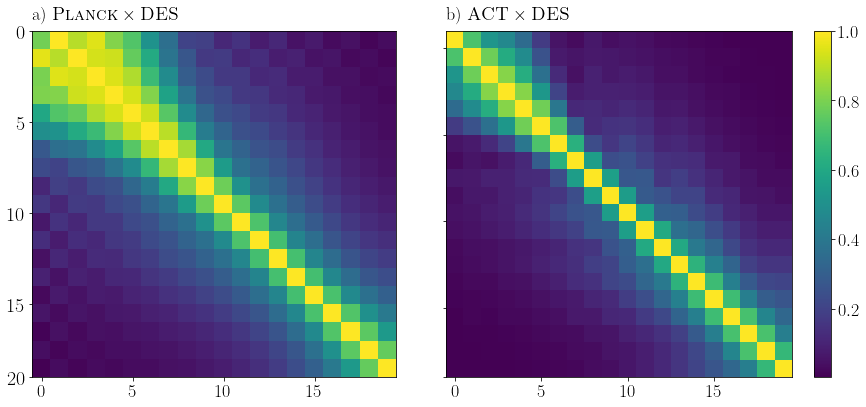

In [57]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr

dv = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov_updatedcov_finalrun3.fits') 
cov_pl = dv['COVMAT'].data[460:480,:][:,460:480]
cov_act = dv['COVMAT'].data[540:560,:][:,540:560]
cov_plact = dv['COVMAT'].data[460:480,:][:,540:560]
cov_tot = np.zeros((40,40))
cov_tot[0:20,0:20] = cov_pl
cov_tot[20:40,20:40] = cov_act
cov_tot[0:20,20:40] = cov_plact
cov_tot[20:40,0:20] = cov_plact.T
fig, ax = pl.subplots(1,2, figsize = (13,6),sharex=True,sharey=True, gridspec_kw = {'hspace':0})
# pl.figure(figsize = (8,6))
im = ax[0].imshow(get_corr(cov_pl))
im = ax[1].imshow(get_corr(cov_act))
pl.colorbar(im)
yticks  = np.array([0.5,5.5,10.5,15.5,19.5])
labels_bottom = np.array([0,5,10,15,20])
ax[0].set_yticks(yticks)
ax[0].set_yticklabels(labels_bottom,  fontsize=20)
# titles:
ax[0].text( 0.0,1.02,r'a) $\textsc{Planck} \times \textsc{DES}$', verticalalignment='bottom', horizontalalignment='left', transform=ax[0].transAxes, fontsize=18)
ax[1].text( 0.0,1.02,r'b) $\textsc{ACT} \times \textsc{DES}$', verticalalignment='bottom', horizontalalignment='left', transform=ax[1].transAxes, fontsize=18)
fig.subplots_adjust(wspace=0.0,hspace=0.0)
# ax[0].set_xticks(yticks)
# ax[0].set_xticklabels(labels_bottom,  fontsize=20)

pl.tight_layout()
fig.savefig('corr_mat_bin4.pdf')


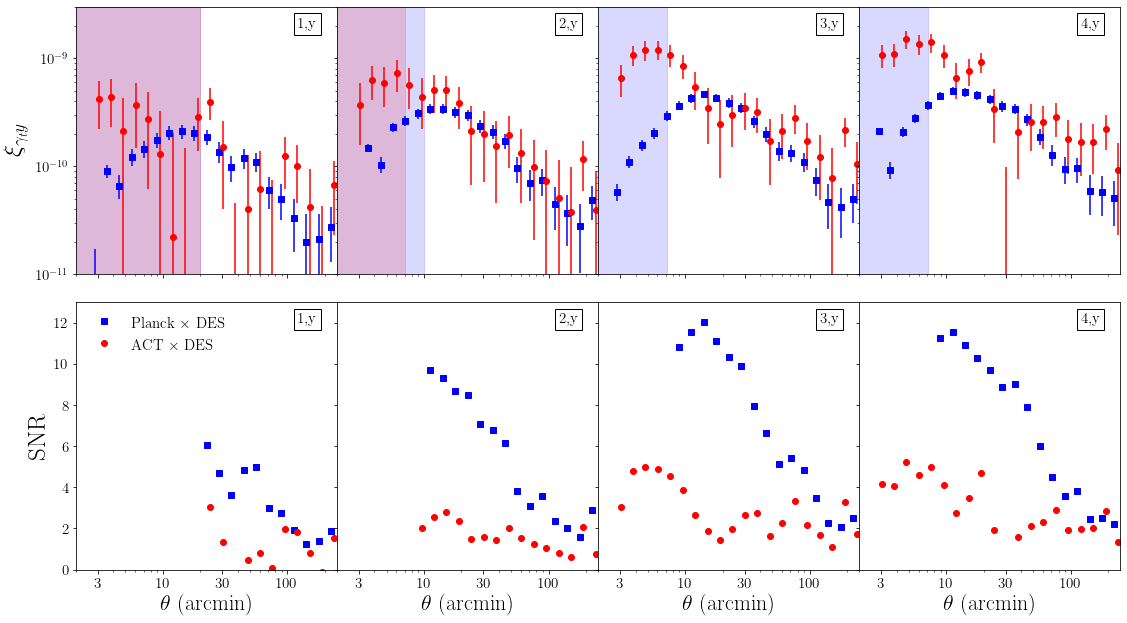

In [60]:
# from twobessel import *
# import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))
from astropy.io import fits
import pickle as pk
import numpy as np

# df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')

df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   


# desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(2,4, figsize = (16,9),sharex=True,sharey='row', gridspec_kw = {'wspace':0})   
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
sc1 = [20,7.1,1.1,1.1]
sc = [20,10.,7.1,7.1]

for j1 in range(1):    
    for j2 in range(4):
                
        bin1y = df['compton_shear'].data['BIN1']
        bin2y = df['compton_shear'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]

        bin1y = df['compton1_shear'].data['BIN1']
        bin2y = df['compton1_shear'].data['BIN2']
        ind_sely1 = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]

           
        yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
        yk_val = df['compton_shear'].data['VALUE'][ind_sely]
        yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:480,400:480][ind_sely,:][:,ind_sely]))            

        yk_th_g1 = df['compton1_shear'].data['ANG'][ind_sely1]
        yk_val1 = df['compton1_shear'].data['VALUE'][ind_sely1]
        yk_err1 = np.sqrt(np.diag(df['COVMAT'].data[480:,480:][ind_sely1,:][:,ind_sely1]))            

        ax[0,j2].errorbar(yk_th_g,yk_val, yk_err, ls='',marker='s',color='blue',label=r'Planck $\times$ DES')
        ax[0,j2].errorbar(1.07*yk_th_g1, yk_val1,yk_err1, ls='',marker='o',color='red',label=r'ACT $\times$ DES')
        ax[0,j2].axvspan(0,sc[j2],alpha=0.15,color='b')
        ax[0,j2].axvspan(0,sc1[j2],alpha=0.15,color='r')
        
        ind_sel = np.where(yk_th_g > sc[j2])[0]
        ax[1,j2].errorbar(yk_th_g[ind_sel],(yk_val/yk_err)[ind_sel], ls='',marker='s',color='blue',label=r'Planck $\times$ DES')
        ind_sel1 = np.where(yk_th_g1 > sc1[j2])[0]
        ax[1,j2].errorbar(1.07*yk_th_g1[ind_sel1], (yk_val1/yk_err1)[ind_sel1], ls='',marker='o',color='red',label=r'ACT $\times$ DES')  
        
        
        ax[0,j2].set_xscale('log')
        ax[0,j2].set_yscale('log')
        
        ax[1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 22)
        ticks  = np.array([3,10,30,100])
        labels_bottom = ticks
        ax[1,j2].set_xticks(ticks)
        ax[0,j2].set_xticks(ticks)
        ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[0,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[0,j2].tick_params(axis='both', which='major', labelsize=15)
        ax[1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[1,j2].tick_params(axis='both', which='major', labelsize=15)
        
        ax[0,j2].set_xlim((2,250))
        ax[0,j2].set_ylim((1e-11,3e-9))
        ax[1,j2].set_ylim((0,13))
        
        ax[0,j2].text( 0.85, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.85, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{\gamma_t y}$ ', size = 25)
ax[1,0].set_ylabel(r'SNR', size = 25)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\sigma(\xi_{+},\xi_{+})$ ', size = 22)
# ax[2,0].set_ylabel(r'$\sigma(\xi_{-},\xi_{-})$ ', size = 22)
ax[1,0].legend(fontsize=15,loc='upper left',frameon=False)
# ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

# fig.savefig('xi_ygt_planck_act_measurement_SNR.pdf')
fig.savefig('xi_ygt_planck_act_measurement_SNR.pdf')



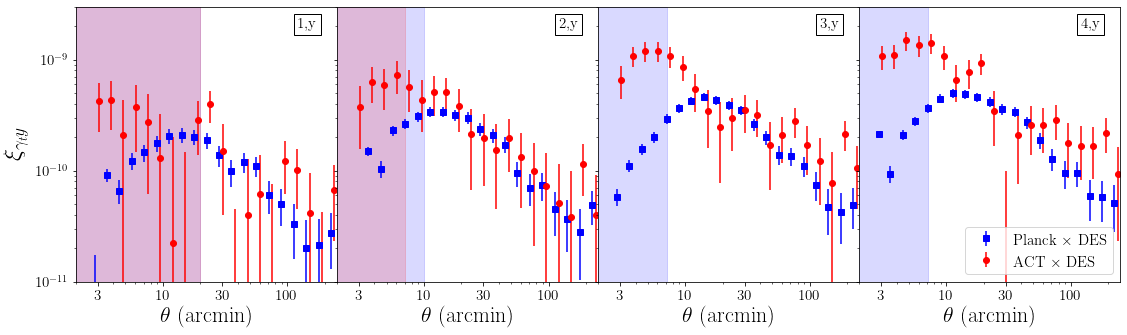

In [7]:
# from twobessel import *
# import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))
from astropy.io import fits
import pickle as pk
import numpy as np

# df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')

df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   


# desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(1,4, figsize = (16,5),sharex=True,sharey='row', gridspec_kw = {'wspace':0})   
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
sc1 = [20,7.1,1.1,1.1]
sc = [20,10.,7.1,7.1]

for j1 in range(1):    
    for j2 in range(4):
                
        bin1y = df['compton_shear'].data['BIN1']
        bin2y = df['compton_shear'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]

        bin1y = df['compton1_shear'].data['BIN1']
        bin2y = df['compton1_shear'].data['BIN2']
        ind_sely1 = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]

           
        yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
        yk_val = df['compton_shear'].data['VALUE'][ind_sely]
        yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:480,400:480][ind_sely,:][:,ind_sely]))            

        yk_th_g1 = df['compton1_shear'].data['ANG'][ind_sely1]
        yk_val1 = df['compton1_shear'].data['VALUE'][ind_sely1]
        yk_err1 = np.sqrt(np.diag(df['COVMAT'].data[480:,480:][ind_sely1,:][:,ind_sely1]))            

        ax[j2].errorbar(yk_th_g,yk_val, yk_err, ls='',marker='s',color='blue',label=r'Planck $\times$ DES')
        ax[j2].errorbar(1.07*yk_th_g1, yk_val1,yk_err1, ls='',marker='o',color='red',label=r'ACT $\times$ DES')
        ax[j2].axvspan(0,sc[j2],alpha=0.15,color='b')
        ax[j2].axvspan(0,sc1[j2],alpha=0.15,color='r')
        
#         ind_sel = np.where(yk_th_g > sc[j2])[0]
#         ax[1,j2].errorbar(yk_th_g[ind_sel],(yk_val/yk_err)[ind_sel], ls='',marker='s',color='blue',label=r'Planck $\times$ DES')
#         ind_sel1 = np.where(yk_th_g1 > sc1[j2])[0]
#         ax[1,j2].errorbar(1.07*yk_th_g1[ind_sel1], (yk_val1/yk_err1)[ind_sel1], ls='',marker='o',color='red',label=r'ACT $\times$ DES')  
        
        
        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')
        
        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 22)
        ticks  = np.array([3,10,30,100])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
        
        ax[j2].set_xlim((2,250))
        ax[j2].set_ylim((1e-11,3e-9))
#         ax[1,j2].set_ylim((0,13))
        
        ax[j2].text( 0.85, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[1,j2].text( 0.85, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{\gamma_t y}$ ', size = 25)
# ax[1,0].set_ylabel(r'SNR', size = 25)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\sigma(\xi_{+},\xi_{+})$ ', size = 22)
# ax[2,0].set_ylabel(r'$\sigma(\xi_{-},\xi_{-})$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower right')
# ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

fig.savefig('xi_ygt_planck_act_measurement.pdf')
# fig.savefig('xi_ygt_planck_act_measurement_SNR.pdf')



In [7]:
cuts_min = [[20,40],[10,40],[7,40],[7,40]]
cuts_max = [[30,250],[30,250],[30,250],[30,250]]

def get_chi2(binv,cuts_min, cuts_max, angv,data, theory,cov_bin):
    if len(cuts_min) > 1:
        selec1 = np.where((angv > cuts_min[0]) & (angv < cuts_max[0]))[0]
        selec2 = np.where((angv > cuts_min[1]) & (angv < cuts_max[1]))[0]
        selection = np.hstack((selec1, selec2))
    else:
        selection = np.where((angv > cuts_min[0]) & (angv < cuts_max[0]))[0]
    
    cov_selec = (cov_bin[:, selection])[selection, :]
    data_selec = data[selection]
    theory_selec = theory[selection]
    diff_selec = (data_selec - theory_selec)
    inv_cov_selec = np.linalg.inv(cov_selec)
    chi2 = np.dot(diff_selec, np.dot(inv_cov_selec, diff_selec))
    return chi2


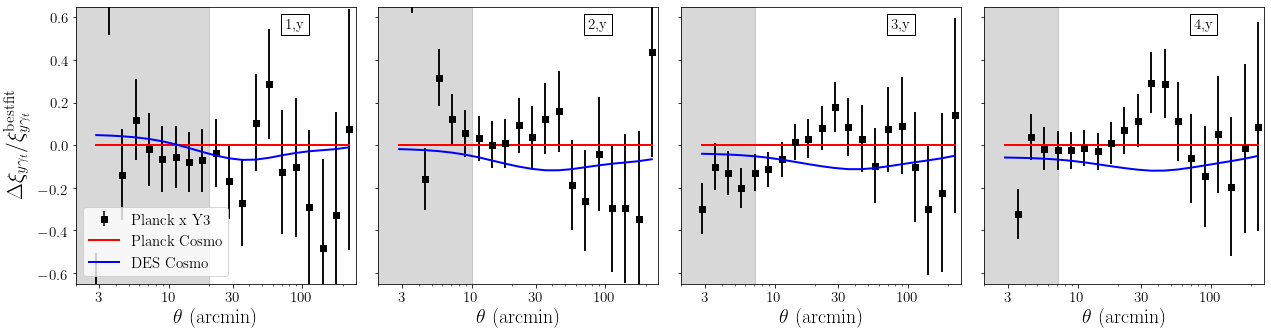

In [102]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fdir = '/global/cfs/cdirs/des/data_actxdes/'
import scipy.interpolate as interpolate
ytype = 'planck'
# ytype = 'act'
do_residuals = 1
show_1h2h = 1
show_chi2 = 1

if ytype == 'act':
    fnames = [
        
                'DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.pk',
        'DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_finalrun3.pk',

#         'DV_MAP_gty_only_HM_delz_m_IA_P0A_P0z_P0m_betaA_betaz_betam_al1_PLcosmo_finalrun2.pk'
    ]
    yt = 2
    from astropy.io import fits
    actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   
    
    bin1_gty = actf['compton1_shear'].data['BIN1']
    bin2_gty = actf['compton1_shear'].data['BIN2']
    gty_csf = actf['compton1_shear'].data['VALUE']
    gty_ang = actf['compton1_shear'].data['ANG']
    gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[480:])
    gty_cov = actf['COVMAT'].data[480:,:][:,480:]
    label_yx = 'ACT x Y3'
    ylims = [-1.2,1.2]
    sc = [20,10,1.1,1.1]

if ytype == 'planck':
    fnames = [
                'DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.pk',
        'DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_finalrun3.pk',
#         'DV_MAP_gty_only_HM_delz_m_IA_P0A_P0z_P0m_betaA_betaz_betam_al1_PLcosmo_finalrun2.pk'
    ]
    yt = 1
    from astropy.io import fits
    actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

    bin1_gty = actf['compton_shear'].data['BIN1']
    bin2_gty = actf['compton_shear'].data['BIN2']
    gty_csf = actf['compton_shear'].data['VALUE']
    gty_ang = actf['compton_shear'].data['ANG']
    gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[400:480])
    gty_cov = actf['COVMAT'].data[400:480,:][:,400:480]
    label_yx = 'Planck x Y3'
    ylims = [-0.65,0.65]
    
    sc = [20,10,7.1,7.1]
    
    
labels = ['Planck Cosmo','DES Cosmo','OWLS AGN']
# labels = ['Mead',r'$R_{\rm max}/R_{\rm 200c} = 3$',r'$R_{\rm max}/R_{\rm 200c} = 2$']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')


for j2 in range(4):
    for jf in range(len(fnames)):

        DV = dill.load(open(fdir + fnames[jf],'rb'))  

        jc = 0
        texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
        texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
        theta_array = DV.xi_result_dict['gty']['theta']
        bin_str = 'yt_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)

        Cl_j1_tot = DV.xi_result_dict['gty'][bin_str]['tot']
        sel_ind = np.where((bin1_gty == j2+1) & (bin2_gty == j2+1))[0]
#         yk_g = df['Yshear_y3'][str(j2)]['xip']
#         yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
#         yk_err = df['Yshear_y3'][str(j2)]['err_p']
        yk_g = gty_csf[sel_ind]
        yk_th_g = gty_ang[sel_ind]
        yk_err = gty_sig[sel_ind]
        cov_bin = gty_cov[sel_ind,:][:,sel_ind]
        inv_cov_bin = np.linalg.inv(cov_bin)

#         print(theta_array)

        if do_residuals:
            Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')

            Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
            if jf == 0:
                Cl_d_th_ref = Cl_d_th

#             if show_chi2:                
#                 diff = np.array([yk_g - Cl_d_th])
#                 snr_bin = np.sqrt(np.dot(diff,np.dot(inv_cov_bin,diff.T)))
#                 print(labels[jf])
#                 print(str(np.round(snr_bin[0][0],1)) + ' sigma'
            
            if jf == 0 and j2 == 0:
                ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black',label=label_yx)
            else:
                ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black')
            
            if ((jf in [0,1,2]) and (j2 == 0)) or ((jf == 0) and (j2 == 1)):
                ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
            else:
                ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf])  
        else:
            if jf == 0:
                ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label=label_yx)
            else:
                ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')
    

            ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
            if show_1h2h:
                Cl_j1_1h = DV.xi_result_dict['gty'][bin_str]['1h']
                Cl_j1_2h = DV.xi_result_dict['gty'][bin_str]['2h']
                ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='--', marker='',lw = 2, color =colors[jf],label='1-halo')  
                ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle=':', marker='',lw = 2, color =colors[jf],label='2-halo')  

        ax[j2].axvspan(0,sc[j2],alpha=0.08,color='k')
        ax[j2].set_xscale('log')

        if do_residuals:
            ax[j2].set_ylim(ylims)        
        else:
            ax[j2].set_yscale('log')
            ax[j2].set_ylim(1e-11,2e-9)


        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
        ticks  = np.array([3,10,30,100])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j2].set_xlim((2,250))
        ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

    # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
    if do_residuals:
        ax[0].set_ylabel(r'$\Delta \xi_{y\gamma_t}/\xi^{\rm bestfit}_{y\gamma_t}$ ', size = 22)
    else:
        ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
    # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
    # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
    ax[0].legend(fontsize=15,loc='lower left')
#     ax[1].legend(fontsize=15,loc='lower left')
    #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_sims_residual_' + str(ytype) + '.pdf')






In [14]:
import pickle
import pyfits as pf
base = '/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis/ACTxDESY3/src/results/'
dd = dict()
path_in = base+'DV_obj_temp_kk_gty_theoryDV_Planck_cosmos_B12_Oref_IA_2h_lin.pk'
dd['IA lin'] = pickle.load(open(path_in,'rb'),fix_imports=True,encoding='latin')
dd['IA lin'].xi_result_dict['gty'][0].keys()


dict_keys(['bin_1_0', 'theta', 'bin_2_0', 'bin_3_0', 'bin_4_0', 'bin_combs'])

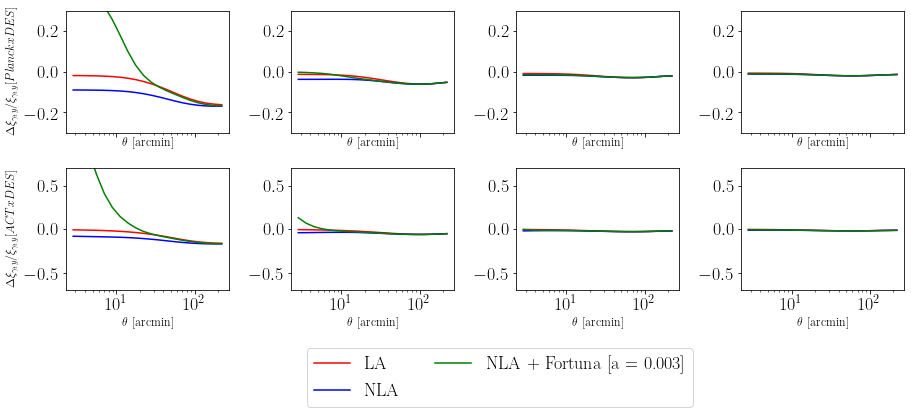

In [16]:
import pickle
import pyfits as pf
xx=12
base = '/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis/ACTxDESY3/src/results/'
dd = dict()
path_in = base+'DV_obj_temp_kk_gty_theoryDV_Planck_cosmos_B12_Oref_IA_2h_lin.pk'
dd['IA lin'] = pickle.load(open(path_in,'rb'),fix_imports=True,encoding='latin')
path_in = base+'DV_obj_temp_kk_gty_theoryDV_Planck_cosmos_B12_Oref.pk'
dd['ref'] = pickle.load(open(path_in,'rb'),fix_imports=True,encoding='latin')
path_in = base+'DV_obj_temp_kk_gty_theoryDV_Planck_cosmos_B12_Oref_IA_2h_Nlin.pk'
dd['IA NL'] = pickle.load(open(path_in,'rb'),fix_imports=True,encoding='latin')
path_in = base+'DV_obj_temp_kk_gty_theoryDV_Planck_cosmos_B12_Oref_IA_1h_Nlin.pk'
dd['IA NL1'] = pickle.load(open(path_in,'rb'),fix_imports=True,encoding='latin')
mute = pf.open('/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis/ACTxDESY3/src/data/DES_planckACT_Buzz_theorycov2.fits')
mute_cov = pf.open('/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis/ACTxDESY3/src/data/theoryDV_obj_temp_kk_gty_theoryDV_Planck_cosmos_B12_Oref_theorycov.fits')
mute_cov_nonoise =  pf.open('/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis/ACTxDESY3/src/data/DES_planckACT_Buzz_theorycov2_nonoise.fits')
fig, ax = plt.subplots(2,4, figsize=(13,5.),sharex=True)
for i in range(4):
    y_err = np.sqrt(mute_cov[1].data[480:,480:].diagonal())[20*i:20*(i+1)]
    xt = dd['ref'].xi_result_dict['gty'][0]['theta']
    yt = dd['ref'].xi_result_dict['gty'][0]['bin_{0}_0'.format(i+1)]['tot']
    yt1 = dd['ref'].xi_result_dict['gty'][1]['bin_{0}_0'.format(i+1)]['tot']
    #ax[i].plot(theta,(y1)/yt,comlor='black',label='LA')
    y_err= np.sqrt(mute_cov[1].data[480:,480:].diagonal())[20*i:20*(i+1)]
    y_err0 = np.sqrt(mute_cov[1].data[400:480,400:480].diagonal())[20*i:20*(i+1)]
    ax[0,i].set_xscale('log', nonposx='clip')
    ax[0,i].set_xlabel(r'$\theta$ [arcmin]', fontsize =xx)
    ax[1,i].set_xscale('log', nonposx='clip')
    ax[1,i].set_xlabel(r'$\theta$ [arcmin]', fontsize =xx)
#     ax[0,i].fill_between(x[5:],x[5:]*0.+y_err0[5:]/yt1[5:],x[5:]*0.-y_err0[5:]/yt[5:],color=colors[2],alpha=0.3,label = 'uncertainties Planck x DES')
#     ax[0,i].plot(theta,theta*0.,color='black')
    y1= dd['IA lin'].xi_result_dict['gty'][0]['bin_{0}_0'.format(i+1)]['tot']
    theta = dd['IA lin'].xi_result_dict['gty'][0]['theta']
    ax[0,i].plot(theta,(y1-yt)/yt,color=colors[0],label='LA')
    y = dd['IA NL'].xi_result_dict['gty'][0]['bin_{0}_0'.format(i+1)]['tot']
    ax[0,i].plot(theta,(y-yt)/yt,color=colors[1],label='NLA')
    y = dd['IA NL1'].xi_result_dict['gty'][0]['bin_{0}_0'.format(i+1)]['tot']
    ax[0,i].plot(theta,(y-yt)/yt,color='green',label='NLA + Fortuna')
    xt = dd['ref'].xi_result_dict['gty'][1]['theta']
    yt = dd['ref'].xi_result_dict['gty'][1]['bin_{0}_0'.format(i+1)]['tot']
    yt1 = dd['ref'].xi_result_dict['gty'][1]['bin_{0}_0'.format(i+1)]['tot']
#     ax[1,i].plot(theta,theta*0.,color='black')
#     ax[1,i].fill_between(x[:],x[:]*0.+y_err[:]/yt1[:],x[:]*0.-y_err[:]/yt1[:],color=colors[2],alpha=0.3,label = 'uncertainties '+r'$\xi_{\gamma_t y}$')
    y1= dd['IA lin'].xi_result_dict['gty'][1]['bin_{0}_0'.format(i+1)]['tot']
    ax[1,i].plot(theta,(y1-yt)/yt,color=colors[0],label='LA')
    y = dd['IA NL'].xi_result_dict['gty'][1]['bin_{0}_0'.format(i+1)]['tot']
    ax[1,i].plot(theta,(y-yt)/yt,color=colors[1],label='NLA')
    y = dd['IA NL1'].xi_result_dict['gty'][1]['bin_{0}_0'.format(i+1)]['tot']
    ax[1,i].plot(theta,(y-yt)/yt,color='green',label='NLA + Fortuna [a = 0.003]')
    #ax[i].plot(x,0.*(y)/yt,color='grey')
    ax[1,i].set_ylim([-0.7,0.7])
    ax[0,i].set_ylim([-0.3,0.3])
ax[0,0].set_ylabel(r'$\Delta\xi_{\gamma_t y}/\xi_{\gamma_t y}$'+'$ [Planck x DES]$', fontsize =xx)
ax[1,0].set_ylabel(r'$\Delta\xi_{\gamma_t y}/\xi_{\gamma_t y}$'+'$ [ACT x DES]$', fontsize =xx)
plt.tight_layout()
ax[1,2].legend(loc='upper center', bbox_to_anchor=(-0.1, -0.4), ncol=2)
# plt.savefig('IA.pdf',bbox_inches='tight')


[-0.65, 0.65]
[-0.65, 0.65]
[-0.65, 0.65]
[-0.65, 0.65]
[-1.2, 1.2]
[-1.2, 1.2]
[-1.2, 1.2]
[-1.2, 1.2]


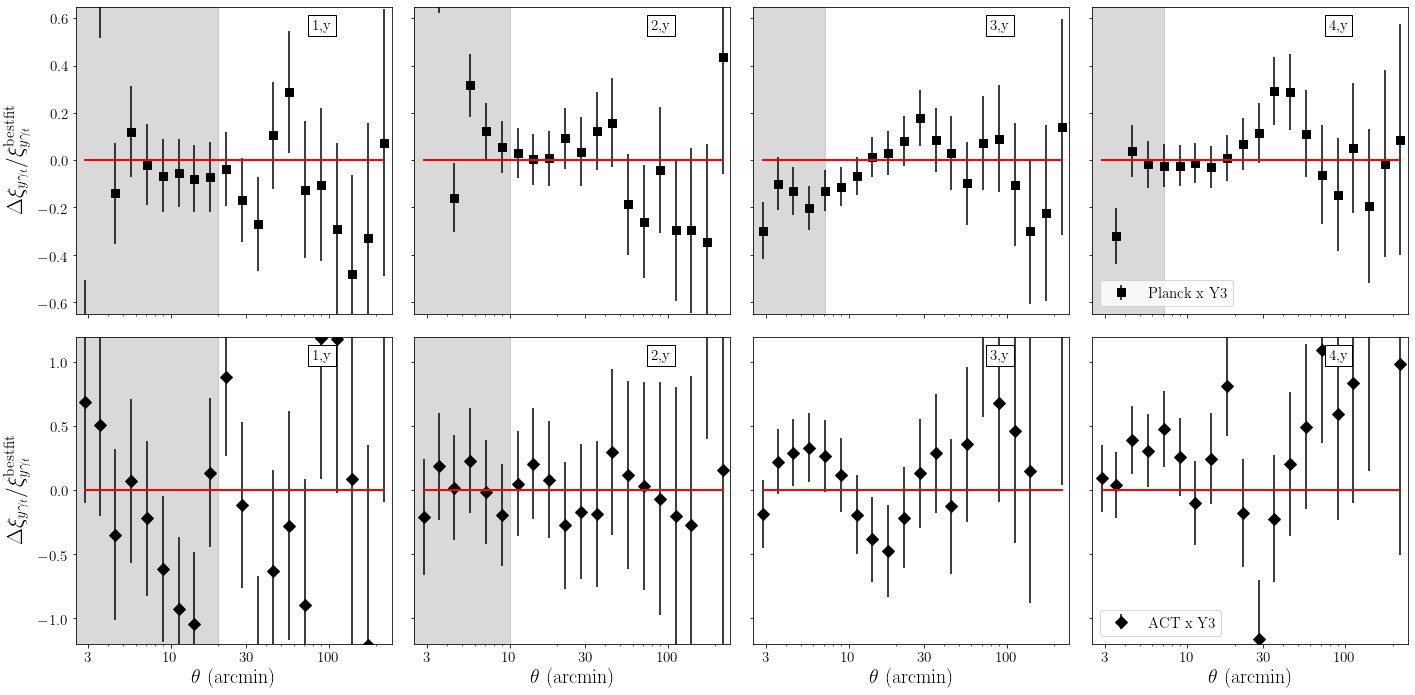

In [42]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fdir = '/global/cfs/cdirs/des/data_actxdes/'
import scipy.interpolate as interpolate
ytype = 'planck'
cosmotype = 'PL'
# cosmotype = 'DES'
do_residuals = 1
show_1h2h = 1
show_chi2 = 1


    
labels = ['Planck Cosmo','DES Cosmo','OWLS AGN']
# labels = ['Mead',r'$R_{\rm max}/R_{\rm 200c} = 3$',r'$R_{\rm max}/R_{\rm 200c} = 2$']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax_all = pl.subplots(2,4, figsize = (20,10),sharex=True,sharey='row')

for j1 in range(2):
    ax = ax_all[j1]
    if cosmotype == 'PL':
        fnames = ['DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.pk']
#         dfb = pk.load(open('/global/cfs/cdirs/des/data_actxdes/bestfit_marco/best_fit_marg_B12_planck_data_mead.pkl','rb'))   
    if cosmotype == 'DES':
        fnames = ['DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.pk'] 
#         dfb = pk.load(open('/global/cfs/cdirs/des/data_actxdes/bestfit_marco/best_fit_marg_B12_DES_data_mead.pkl','rb'))  
    if j1 == 1:        
        yt = 2
        from astropy.io import fits
        actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

        bin1_gty = actf['compton1_shear'].data['BIN1']
        bin2_gty = actf['compton1_shear'].data['BIN2']
        gty_csf = actf['compton1_shear'].data['VALUE']
        gty_ang = actf['compton1_shear'].data['ANG']
        gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[480:])
        gty_cov = actf['COVMAT'].data[480:,:][:,480:]
        label_yx = 'ACT x Y3'
        ylims = [-1.2,1.2]
        sc = [20,10,1.1,1.1]
        markerv = 'D'

    if j1 == 0:
        yt = 1
        from astropy.io import fits
        actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

        bin1_gty = actf['compton_shear'].data['BIN1']
        bin2_gty = actf['compton_shear'].data['BIN2']
        gty_csf = actf['compton_shear'].data['VALUE']
        gty_ang = actf['compton_shear'].data['ANG']
        gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[400:480])
        gty_cov = actf['COVMAT'].data[400:480,:][:,400:480]
        label_yx = 'Planck x Y3'
        ylims = [-0.65,0.65]
        markerv= 's'
        sc = [20,10,7.1,7.1]

    
    for j2 in range(4):
        for jf in range(len(fnames)):

            DV = dill.load(open(fdir + fnames[jf],'rb'))  

            jc = 0
            texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
            texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
            theta_array = DV.xi_result_dict['gty']['theta']
            bin_str = 'yt_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
            
            Cl_j1_tot = DV.xi_result_dict['gty'][bin_str]['tot']
            
#             theta_jfb = dfb['dv'][0][j1]['theta']
#             Cl_jfb_tot = dfb['dv'][0][j1]['bin_' + str(j2+1) + '_' + str(0)]['tot']
            
            sel_ind = np.where((bin1_gty == j2+1) & (bin2_gty == j2+1))[0]

            yk_g = gty_csf[sel_ind]
            yk_th_g = gty_ang[sel_ind]
            yk_err = gty_sig[sel_ind]
            cov_bin = gty_cov[sel_ind,:][:,sel_ind]
            inv_cov_bin = np.linalg.inv(cov_bin)


            if do_residuals:
                for jp in range(1):
                    if jp == 0:
                        Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')
                        Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
                        label_jp = 'Vary Pressure profile'
                        color_jp = 'r'
                    else:
                        Cl_interp = interpolate.interp1d(np.log(theta_jfb), np.log(Cl_jfb_tot),fill_value='extrapolate')
                        Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))    
                        label_jp = 'Vary Cosmo'
                        color_jp = 'b'
                    if jp == 0:
                        Cl_d_th_ref = Cl_d_th

                    if jf == 0 and jp == 0:
                        ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker=markerv,color='black',label=label_yx,ms=8.0)
                    else:
                        ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker=markerv,color='black',ms=8.0)

                    if ((jf in [0,1,2])):
                        ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =color_jp)  
                    else:
                        ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =color_jp)  
                        
            else:
                if jf == 0:
                    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label=label_yx)
                else:
                    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')


                ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
                if show_1h2h:
                    Cl_j1_1h = DV.xi_result_dict['gty'][bin_str]['1h']
                    Cl_j1_2h = DV.xi_result_dict['gty'][bin_str]['2h']
                    ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='--', marker='',lw = 2, color =colors[jf],label='1-halo')  
                    ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle=':', marker='',lw = 2, color =colors[jf],label='2-halo')  

            ax[j2].axvspan(0,sc[j2],alpha=0.15,color='k')
            ax[j2].set_xscale('log')

            if do_residuals:
                print(ylims)
                ax[j2].set_ylim(ylims)        
            else:
                ax[j2].set_yscale('log')
                ax[j2].set_ylim(1e-11,2e-9)

            if j1==1:
                ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([3,10,30,100])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

            ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
            ax[j2].tick_params(axis='both', which='major', labelsize=15)
            ax[j2].set_xlim((2.5,250))
            ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


            jc += 1

        # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
        if do_residuals:
            ax[0].set_ylabel(r'$\Delta \xi_{y\gamma_t}/\xi^{\rm bestfit}_{y\gamma_t}$ ', size = 22)
        else:
            ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
        # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
        # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
        ax[3].legend(fontsize=15,loc='lower left')
    #     ax[1].legend(fontsize=15,loc='lower left')
        #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('gty_residual_vary_cosmo_varyP_' + str(cosmotype) + '.pdf')
fig.savefig('gty_residual_bestfit.pdf')






No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[-0.68, 0.68]
[-0.68, 0.68]
[-0.68, 0.68]
[-0.68, 0.68]
[-1.4, 1.4]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


[-1.4, 1.4]
[-1.4, 1.4]
[-1.4, 1.4]


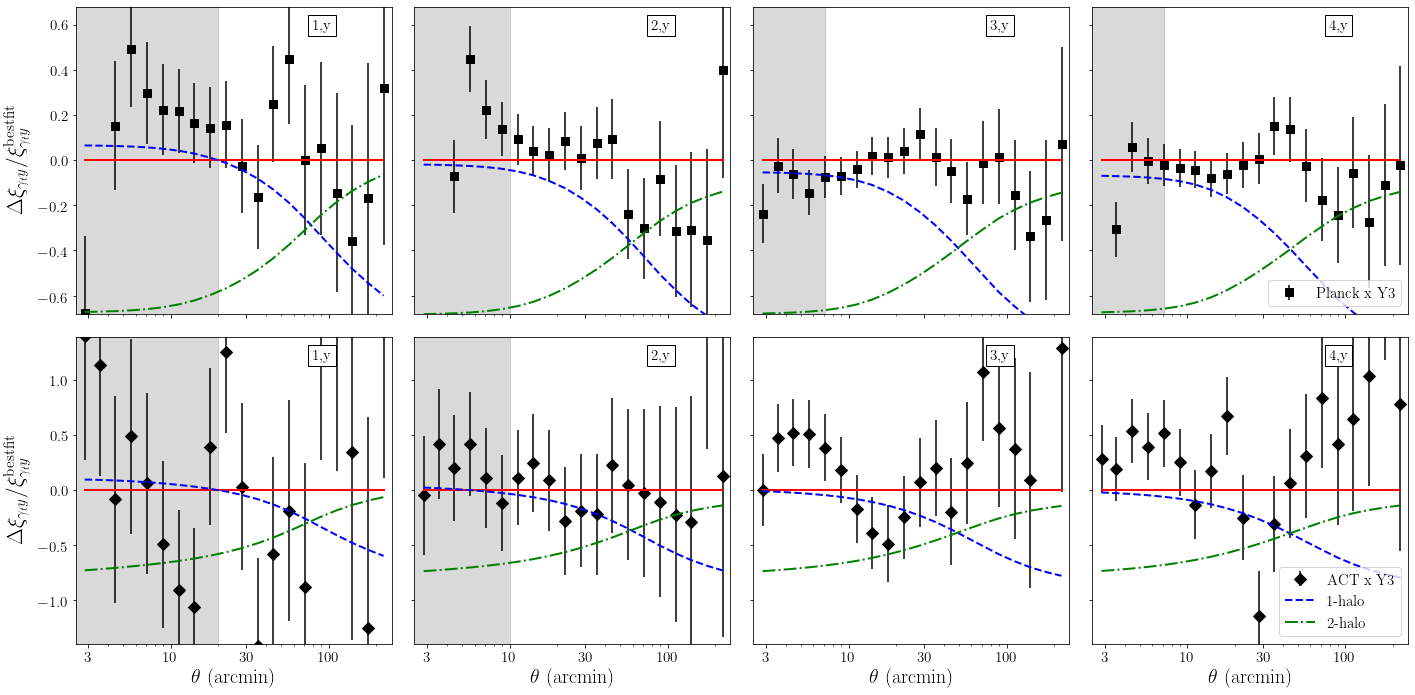

In [10]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fdir = '/global/cfs/cdirs/des/data_actxdes/'
import scipy.interpolate as interpolate
ytype = 'planck'
cosmotype = 'PL'
# cosmotype = 'DES'
do_residuals = 1
show_1h2h = 1
show_chi2 = 1


    
labels = ['Planck Cosmo','DES Cosmo','OWLS AGN']
# labels = ['Mead',r'$R_{\rm max}/R_{\rm 200c} = 3$',r'$R_{\rm max}/R_{\rm 200c} = 2$']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax_all = pl.subplots(2,4, figsize = (20,10),sharex=True,sharey='row')

for j1 in range(2):
    ax = ax_all[j1]
    if cosmotype == 'PL':
        fnames = ['DV_MAP_values_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.pk']
#         dfb = pk.load(open('/global/cfs/cdirs/des/data_actxdes/bestfit_marco/best_fit_marg_B12_planck_data_mead.pkl','rb'))   
    if cosmotype == 'DES':
        fnames = ['DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.pk'] 
#         dfb = pk.load(open('/global/cfs/cdirs/des/data_actxdes/bestfit_marco/best_fit_marg_B12_DES_data_mead.pkl','rb'))  
    if j1 == 1:        
        yt = 2
        from astropy.io import fits
        actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

        bin1_gty = actf['compton1_shear'].data['BIN1']
        bin2_gty = actf['compton1_shear'].data['BIN2']
        gty_csf = actf['compton1_shear'].data['VALUE']
        gty_ang = actf['compton1_shear'].data['ANG']
        gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[480:])
        gty_cov = actf['COVMAT'].data[480:,:][:,480:]
        label_yx = 'ACT x Y3'
        ylims = [-1.4,1.4]
        sc = [20,10,1.1,1.1]
        markerv = 'D'

    if j1 == 0:
        yt = 1
        from astropy.io import fits
        actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

        bin1_gty = actf['compton_shear'].data['BIN1']
        bin2_gty = actf['compton_shear'].data['BIN2']
        gty_csf = actf['compton_shear'].data['VALUE']
        gty_ang = actf['compton_shear'].data['ANG']
        gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[400:480])
        gty_cov = actf['COVMAT'].data[400:480,:][:,400:480]
        label_yx = 'Planck x Y3'
        ylims = [-0.68,0.68]
        markerv= 's'
        sc = [20,10,7.1,7.1]

    
    for j2 in range(4):
        for jf in range(len(fnames)):

            DV = dill.load(open(fdir + fnames[jf],'rb'))  

            jc = 0
            texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
            texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
            theta_array = DV.xi_result_dict['gty']['theta']
            bin_str = 'yt_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
            
            Cl_j1_tot = DV.xi_result_dict['gty'][bin_str]['tot']
            Cl_j1_1h = DV.xi_result_dict['gty'][bin_str]['1h']
            Cl_j1_2h = DV.xi_result_dict['gty'][bin_str]['2h']
            
#             theta_jfb = dfb['dv'][0][j1]['theta']
#             Cl_jfb_tot = dfb['dv'][0][j1]['bin_' + str(j2+1) + '_' + str(0)]['tot']
            
            sel_ind = np.where((bin1_gty == j2+1) & (bin2_gty == j2+1))[0]

            yk_g = gty_csf[sel_ind]
            yk_th_g = gty_ang[sel_ind]
            yk_err = gty_sig[sel_ind]
            cov_bin = gty_cov[sel_ind,:][:,sel_ind]
            inv_cov_bin = np.linalg.inv(cov_bin)


            if do_residuals:
                for jp in range(1):
                    if jp == 0:
                        Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')
                        Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
                        Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_1h),fill_value='extrapolate')
                        Cl_d_th_1h = np.exp(Cl_interp(np.log(yk_th_g)))
                        Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_2h),fill_value='extrapolate')
                        Cl_d_th_2h = np.exp(Cl_interp(np.log(yk_th_g)))                        
                        label_jp = 'Vary Pressure profile'
                        color_jp = 'r'
#                     else:
#                         Cl_interp = interpolate.interp1d(np.log(theta_jfb), np.log(Cl_jfb_tot),fill_value='extrapolate')
#                         Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))    
#                         label_jp = 'Vary Cosmo'
#                         color_jp = 'b'
                    if jp == 0:
                        Cl_d_th_ref = Cl_d_th

                    if jf == 0 and jp == 0:
                        ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker=markerv,color='black',label=label_yx,ms=8.0)
                    else:
                        ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker=markerv,color='black',ms=8.0)

#                     if ((jf in [0,1,2])):
                    ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color ='red')  
                    if j1 == 1:
                        ax[j2].errorbar(yk_th_g, (Cl_d_th_1h/Cl_d_th_ref) -1 , linestyle='--', marker='',lw = 2, color ='blue',label='1-halo')  
                        ax[j2].errorbar(yk_th_g, (Cl_d_th_2h/Cl_d_th_ref) -1 , linestyle='-.', marker='',lw = 2, color ='green',label='2-halo')  
                    else:
                        ax[j2].errorbar(yk_th_g, (Cl_d_th_1h/Cl_d_th_ref) -1 , linestyle='--', marker='',lw = 2, color ='blue')  
                        ax[j2].errorbar(yk_th_g, (Cl_d_th_2h/Cl_d_th_ref) -1 , linestyle='-.', marker='',lw = 2, color ='green')  
                        
            else:
                if jf == 0:
                    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label=label_yx)
                else:
                    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')


                ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
                if show_1h2h:
                    Cl_j1_1h = DV.xi_result_dict['gty'][bin_str]['1h']
                    Cl_j1_2h = DV.xi_result_dict['gty'][bin_str]['2h']
                    ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='--', marker='',lw = 2, color =colors[jf],label='1-halo')  
                    ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle=':', marker='',lw = 2, color =colors[jf],label='2-halo')  

            ax[j2].axvspan(0,sc[j2],alpha=0.15,color='k')
            ax[j2].set_xscale('log')

            if do_residuals:
                print(ylims)
                ax[j2].set_ylim(ylims)        
            else:
                ax[j2].set_yscale('log')
                ax[j2].set_ylim(1e-11,2e-9)

            if j1==1:
                ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([3,10,30,100])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

            ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
            ax[j2].tick_params(axis='both', which='major', labelsize=15)
            ax[j2].set_xlim((2.5,250))
            ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


            jc += 1

        # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
        if do_residuals:
            ax[0].set_ylabel(r'$\Delta \xi_{\gamma_t y}/\xi^{\rm bestfit}_{\gamma_t y}$ ', size = 22)
        else:
            ax[0].set_ylabel(r'$\xi_{\gamma_t y}(\theta)$ ', size = 22)
        # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
        # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
        ax[3].legend(fontsize=15,loc='lower right')
    #     ax[1].legend(fontsize=15,loc='lower left')
        #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('gty_residual_vary_cosmo_varyP_' + str(cosmotype) + '.pdf')
fig.savefig('gty_residual_bestfit_1h2h.pdf')






/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:169: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


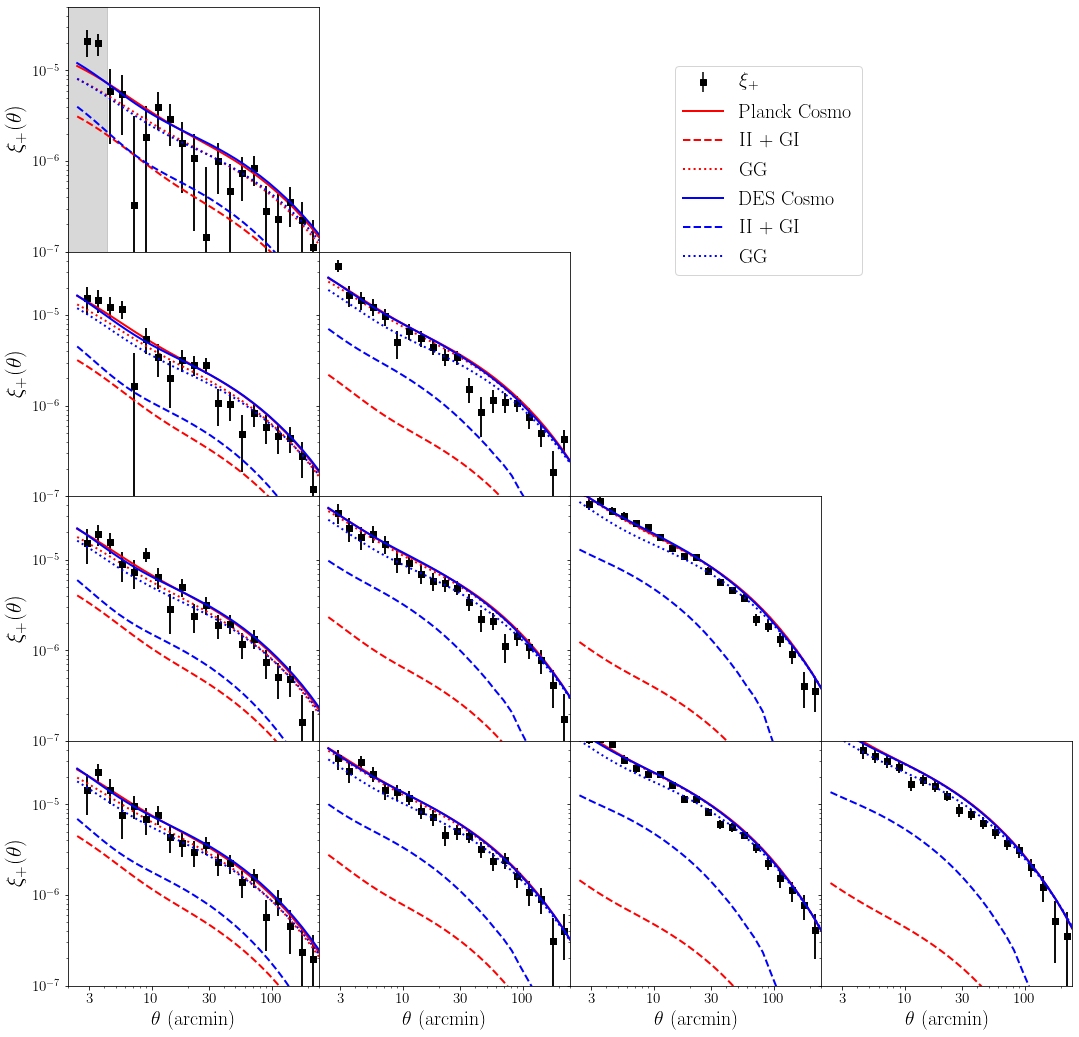

In [51]:
import configparser
config = configparser.ConfigParser()
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fdir = '/global/cfs/cdirs/des/data_actxdes/'
import scipy.interpolate as interpolate
ptype = 'xip'
# ptype = 'xim'
# ytype = 'act'
do_residuals = 0
show_1h2h = 1
show_IA = 1
show_chi2 = 1
scf = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/scale_cuts/scales_gty_fid_xipxim_y3_finalrun3.ini'  
config.read(scf)
# print()

if ptype == 'xip':
    fnames = [
        'DV_MAP_values_xipm_fidcuts_HM_delz_m_IA_al1_PLcosmo_finalrun3.pk',
        'DV_MAP_values_xipm_fidcuts_HM_delz_m_IA_al1_DEScosmo_finalrun3.pk',
    ]
    yt = 2
    from astropy.io import fits
    actf = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov_updatedcov_finalrun3.fits')   
    
    bin1_gty = actf['xip'].data['BIN1']
    bin2_gty = actf['xip'].data['BIN2']
    gty_csf = actf['xip'].data['VALUE']
    gty_ang = actf['xip'].data['ANG']
    gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[0:200])
    gty_cov = actf['COVMAT'].data[0:200,:][:,0:200]
    label_yx = r'$\xi_{+}$'
    ylims = [-1.2,1.2]
#     sc = [20,10,1.1,1.1]

if ptype == 'xim':
    fnames = [
        'DV_MAP_values_xipm_fidcuts_HM_delz_m_IA_al1_PLcosmo_finalrun3.pk',
        'DV_MAP_values_xipm_fidcuts_HM_delz_m_IA_al1_DEScosmo_finalrun3.pk',
    ]
    yt = 1
    from astropy.io import fits
    actf = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov_updatedcov_finalrun3.fits')   

    bin1_gty = actf['xim'].data['BIN1']
    bin2_gty = actf['xim'].data['BIN2']
    gty_csf = actf['xim'].data['VALUE']
    gty_ang = actf['xim'].data['ANG']
    gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[200:400])
    gty_cov = actf['COVMAT'].data[200:400,:][:,200:400]
    label_yx = r'$\xi_{-}$'
    ylims = [-1.5,1.5]
    
    sc = [20,10,7.1,7.1]
    
    
labels = ['Planck Cosmo','DES Cosmo','OWLS AGN']
# labels = ['Mead',r'$R_{\rm max}/R_{\rm 200c} = 3$',r'$R_{\rm max}/R_{\rm 200c} = 2$']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax_all = pl.subplots(4,4, figsize = (18,18),sharex=True,sharey='row',gridspec_kw={'hspace':0.0,'wspace':0.0})
for j1 in range(4):
    ax = ax_all[j1]
    for j2 in range(4):
        if j1 < j2:
            fig.delaxes(ax_all[j1,j2])
        else:
            for jf in range(len(fnames)):

                DV = dill.load(open(fdir + fnames[jf],'rb'))  

                jc = 0
                theta_array = DV.xi_result_dict['kk']['theta']
                bin_str = 'bin_' + str(j2+1) + '_' + str(j1+1)
                if ptype == 'xip':
                    Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['tot']
                if ptype == 'xim':
                    Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['totm']

                sel_ind = np.where((bin1_gty == j1+1) & (bin2_gty == j2+1))[0]
                yk_g = gty_csf[sel_ind]
                yk_th_g = gty_ang[sel_ind]
                yk_err = gty_sig[sel_ind]
                cov_bin = gty_cov[sel_ind,:][:,sel_ind]
                inv_cov_bin = np.linalg.inv(cov_bin)

                if do_residuals:
                    Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')

                    Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
                    if jf == 0:
                        Cl_d_th_ref = Cl_d_th


                    if jf == 0 and j2 == 0:
                        ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black',label=label_yx)
                    else:
                        ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black')

                    if ((jf in [0,1,2]) and (j2 == 0)) or ((jf == 0) and (j2 == 1)):
                        ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
                    else:
                        ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf])  
                else:
                    if jf == 0:
                        ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label=label_yx)
                    else:
                        ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')


                    ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
#                     if show_1h2h:
#                         Cl_j1_1h = DV.xi_result_dict['gty'][bin_str]['1h']
#                         Cl_j1_2h = DV.xi_result_dict['gty'][bin_str]['2h']
#                         ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='--', marker='',lw = 2, color =colors[jf],label='1-halo')  
#                         ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle=':', marker='',lw = 2, color =colors[jf],label='2-halo')  

                    if show_IA:
                        if ptype == 'xip':
                            Cl_j1_IA = DV.xi_result_dict['kk'][bin_str]['int']
                            Cl_j1_phy = DV.xi_result_dict['kk'][bin_str]['phy']
                        if ptype == 'xim':
                            Cl_j1_IA = DV.xi_result_dict['kk'][bin_str]['intm']
                            Cl_j1_phy = DV.xi_result_dict['kk'][bin_str]['phym']

                        ax[j2].errorbar(theta_array, Cl_j1_IA, linestyle='--', marker='',lw = 2, color =colors[jf],label='II + GI')  
                        ax[j2].errorbar(theta_array, Cl_j1_phy, linestyle=':', marker='',lw = 2, color =colors[jf],label='GG')  


                scv = list(map(float,config['2pt_like']['angle_range_' + str(ptype) + '_' + str(j2+1) + '_' + str(j1+1)].split()))[0] 
                ax[j2].axvspan(0,scv,alpha=0.08,color='k')
                ax[j2].set_xscale('log')

                if do_residuals:
                    ax[j2].set_ylim(ylims)        
                else:
                    ax[j2].set_yscale('log')
                    ax[j2].set_ylim(1e-7,5e-5)

                if j1 == 3:
                    ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
                ticks  = np.array([3,10,30,100])
                labels_bottom = ticks
                ax[j2].set_xticks(ticks)
                ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

                ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
                ax[j2].tick_params(axis='both', which='major', labelsize=15)
                ax[j2].set_xlim((2,250))
#                 ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


                jc += 1

            # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
            if do_residuals:
                if ptype == 'xip':
                    ax[0].set_ylabel(r'$\Delta \xi_{+}/\xi^{\rm bestfit}_{+}$ ', size = 22)
                if ptype == 'xim':
                    ax[0].set_ylabel(r'$\Delta \xi_{-}/\xi^{\rm bestfit}_{-}$ ', size = 22)
                
            else:
                if ptype == 'xip':
                    ax[0].set_ylabel(r'$\xi_{+}(\theta)$ ', size = 22)
                if ptype == 'xim':
                    ax[0].set_ylabel(r'$\xi_{-}(\theta)$ ', size = 22)
ax_all[0,0].legend(fontsize=20, bbox_to_anchor=(3.2, 0.8))
pl.tight_layout()

fig.savefig(ptype + '_residual_' + 'chain_xipm_only_wIA' + '.pdf')






In [6]:
df1 = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/param_grid/save_gty_Agrid_arx.pk','rb'))   
ahm_v = np.array(list(df1.keys()))
df1[ahm_v[0]].keys()
# for ja in range(len(ahm_v)):
    



dict_keys(['theta', 'yt_1bin_1_0', 'yt_2bin_1_0', 'yt_1bin_2_0', 'yt_2bin_2_0', 'yt_1bin_3_0', 'yt_2bin_3_0', 'yt_1bin_4_0', 'yt_2bin_4_0'])

In [41]:
np.array(list(df1.keys()))


array([ 0.40295642, -1.5       , -1.44915254, -1.39830508, -1.34745763,
       -1.29661017, -1.24576271, -1.19491525, -1.1440678 , -1.09322034,
       -1.04237288, -0.99152542, -0.94067797, -0.88983051, -0.83898305,
       -0.78813559, -0.73728814, -0.68644068, -0.63559322, -0.58474576,
       -0.53389831, -0.48305085, -0.43220339, -0.38135593, -0.33050847,
       -0.27966102, -0.22881356, -0.1779661 , -0.12711864, -0.07627119,
       -0.02542373,  0.02542373,  0.07627119,  0.12711864,  0.1779661 ,
        0.22881356,  0.27966102,  0.33050847,  0.38135593,  0.43220339,
        0.48305085,  0.53389831,  0.58474576,  0.63559322,  0.68644068,
        0.73728814,  0.78813559,  0.83898305,  0.88983051,  0.94067797,
        0.99152542,  1.04237288,  1.09322034,  1.1440678 ,  1.19491525,
        1.24576271,  1.29661017,  1.34745763,  1.39830508,  1.44915254,
        1.5       ])

Text(0, 0.5, '$\\eta_{\\rm IA}$')

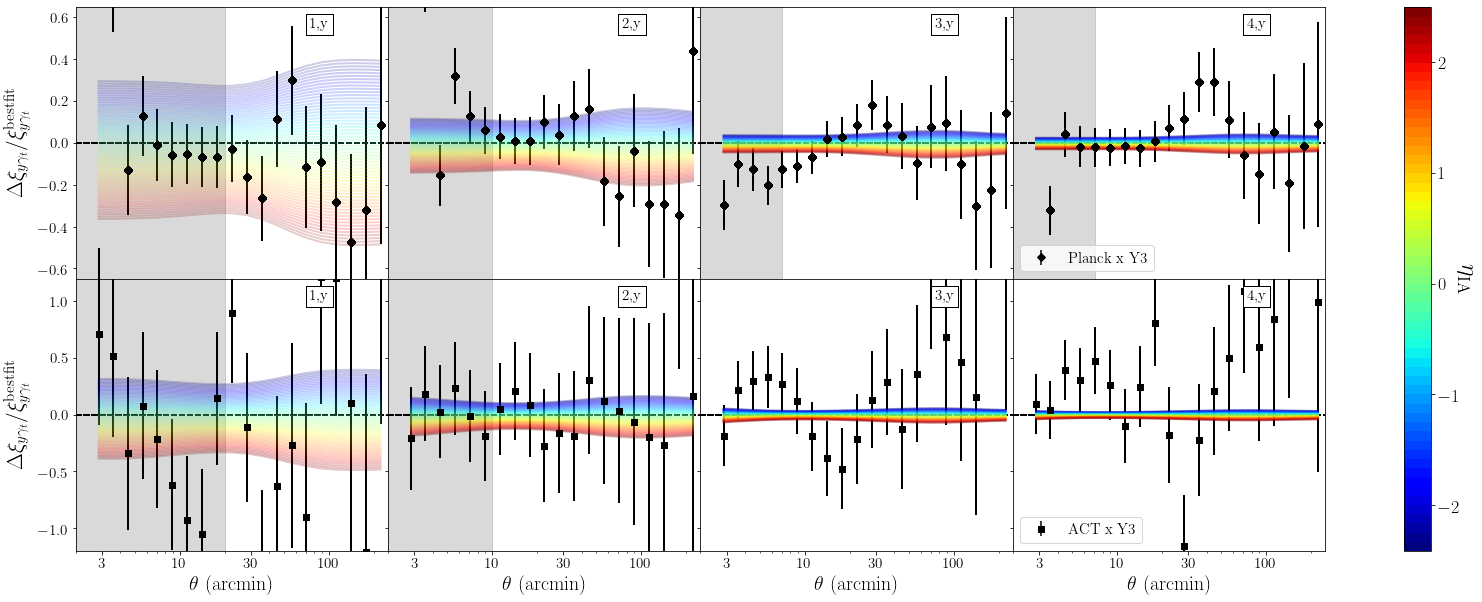

In [91]:
import matplotlib as mpl
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fdir = '/global/cfs/cdirs/des/data_actxdes/'
import scipy.interpolate as interpolate
ytype = 'planck'
cosmotype = 'PL'
# cosmotype = 'DES'
do_residuals = 1
show_1h2h = 0
show_chi2 = 0
    
labels = ['Planck Cosmo','DES Cosmo','OWLS AGN']
# labels = ['Mead',r'$R_{\rm max}/R_{\rm 200c} = 3$',r'$R_{\rm max}/R_{\rm 200c} = 2$']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax_all = pl.subplots(2,4, figsize = (28,10),sharex=True,sharey='row',gridspec_kw = {'wspace':0.0, 'hspace':0.0})
df1 = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/param_grid/save_gty_AIAgrid.pk','rb'))   
ahm_v = np.array(list(df1.keys()))[1:]
# ahm_fid = 0.402956417083746
# ahm_fid =0.151492156293947
ahm_fid = -0.276997957770443
# ahm_fid = 0.518187061074332

ind_fid = np.where(ahm_v > ahm_fid)[0][0]
theta_array = df1[ahm_v[0]]['theta']

cmap = plt.get_cmap('jet',len(ahm_v))
for j1 in range(2):
    ax = ax_all[j1]
 
    if j1 == 1:        
        yt = 2
        from astropy.io import fits
        actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

        bin1_gty = actf['compton1_shear'].data['BIN1']
        bin2_gty = actf['compton1_shear'].data['BIN2']
        gty_csf = actf['compton1_shear'].data['VALUE']
        gty_ang = actf['compton1_shear'].data['ANG']
        gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[480:])
        gty_cov = actf['COVMAT'].data[480:,:][:,480:]
        label_yx = 'ACT x Y3'
        ylims = [-1.2,1.2]
        sc = [20,10,1.1,1.1]
        mss = 's'

    if j1 == 0:
        yt = 1
        from astropy.io import fits
        actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

        bin1_gty = actf['compton_shear'].data['BIN1']
        bin2_gty = actf['compton_shear'].data['BIN2']
        gty_csf = actf['compton_shear'].data['VALUE']
        gty_ang = actf['compton_shear'].data['ANG']
        gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[400:480])
        gty_cov = actf['COVMAT'].data[400:480,:][:,400:480]
        label_yx = 'Planck x Y3'
        ylims = [-0.65,0.65]
        mss = 'D'

        sc = [20,10,7.1,7.1]

    
    for j2 in range(4):
        for jf in range(len(ahm_v)):
            color =cmap(jf)
            DVj = df1[ahm_v[jf]]
            jc = 0
            texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
            texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
            bin_str = 'yt_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
            
            Cl_j1_tot = DVj[bin_str]
            
#             theta_jfb = dfb['dv'][0][j1]['theta']
#             Cl_jfb_tot = dfb['dv'][0][j1]['bin_' + str(j2+1) + '_' + str(0)]['tot']
            
            sel_ind = np.where((bin1_gty == j2+1) & (bin2_gty == j2+1))[0]

            yk_g = gty_csf[sel_ind]
            yk_th_g = gty_ang[sel_ind]
            yk_err = gty_sig[sel_ind]
            cov_bin = gty_cov[sel_ind,:][:,sel_ind]
            inv_cov_bin = np.linalg.inv(cov_bin)


            if do_residuals:
                if jf == 0:
                    DVj = df1[ahm_v[ind_fid]]
                    bin_str = 'yt_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
                    Cl_fid_tot = DVj[bin_str]
                    Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_fid_tot),fill_value='extrapolate')
                    Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
                    Cl_d_th_ref = Cl_d_th
                Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')
                Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
                
                if jf == 0:
                    ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker=mss,color='black',label=label_yx)
                else:
                    ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker=mss,color='black')


                ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =color,alpha=0.2)  
                        
            else:
                if jf == 0:
                    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label=label_yx)
                else:
                    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')


                ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =color)  
            
            if jf == 0:
                ax[j2].axvspan(0,sc[j2],alpha=0.15,color='k')
            ax[j2].set_xscale('log')

            if do_residuals:
#                 print(ylims)
                ax[j2].set_ylim(ylims) 
                ax[j2].axhline(0.0,ls='--',color='k')
            else:
                ax[j2].set_yscale('log')
                ax[j2].set_ylim(1e-11,2e-9)

            if j1 == 1:
                ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([3,10,30,100])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

            ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
            ax[j2].tick_params(axis='both', which='major', labelsize=15)
            ax[j2].set_xlim((2,250))
            ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


            jc += 1

        # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
        if do_residuals:
            ax[0].set_ylabel(r'$\Delta \xi_{y\gamma_t}/\xi^{\rm bestfit}_{y\gamma_t}$ ', size = 22)
        else:
            ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
        # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
        # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
        ax[3].legend(fontsize=15,loc='lower left')
    #     ax[1].legend(fontsize=15,loc='lower left')
        #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

norm = mpl.colors.Normalize(vmin=np.amin(ahm_v),vmax=np.amax(ahm_v))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# plt.colorbar(sm, ticks=np.linspace(0,2,N), 
#              boundaries=np.arange(-0.05,2.1,.1))

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# cbar = fig.colorbar(sm, cax=cbar_ax)
cbar = fig.colorbar(sm, ax=ax_all.ravel().tolist())
# cbar = fig.colorbar(sm, orientation="horizontal", pad=0.2)
cbar.ax.get_yaxis().labelpad = 15
# cbar.ax.set_ylabel(r'$A_{\rm hm}$', rotation=270,size=24)
# cbar.ax.set_ylabel(r'$\eta_{\rm hm}$', rotation=270,size=24)
cbar.ax.set_ylabel(r'$A_{\rm IA}$', rotation=270,size=24)
# cbar.ax.set_ylabel(r'$\eta_{\rm IA}$', rotation=270,size=24)
# pl.tight_layout()

# fig.savefig('gty_residual_vary_cosmo_varyP_' + str(cosmotype) + '.pdf')






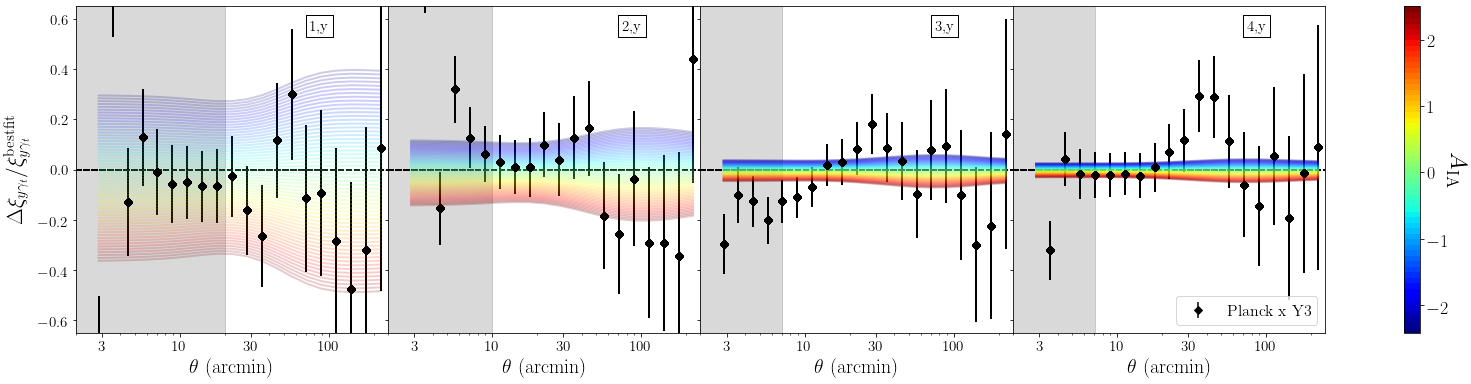

In [99]:
import matplotlib as mpl
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fdir = '/global/cfs/cdirs/des/data_actxdes/'
import scipy.interpolate as interpolate
ytype = 'planck'
cosmotype = 'PL'
# cosmotype = 'DES'
do_residuals = 1
show_1h2h = 0
show_chi2 = 0
    
labels = ['Planck Cosmo','DES Cosmo','OWLS AGN']
# labels = ['Mead',r'$R_{\rm max}/R_{\rm 200c} = 3$',r'$R_{\rm max}/R_{\rm 200c} = 2$']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax_all = pl.subplots(1,4, figsize = (28,6),sharex=True,sharey='row',gridspec_kw = {'wspace':0.0, 'hspace':0.0})
df1 = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/param_grid/save_gty_AIAgrid.pk','rb'))   
ahm_v = np.array(list(df1.keys()))[1:]
# ahm_fid = 0.402956417083746
# ahm_fid =0.151492156293947
ahm_fid = -0.276997957770443
# ahm_fid = 0.518187061074332

ind_fid = np.where(ahm_v > ahm_fid)[0][0]
theta_array = df1[ahm_v[0]]['theta']

cmap = plt.get_cmap('jet',len(ahm_v))
for j1 in range(1):
    ax = ax_all
 
    if j1 == 1:        
        yt = 2
        from astropy.io import fits
        actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

        bin1_gty = actf['compton1_shear'].data['BIN1']
        bin2_gty = actf['compton1_shear'].data['BIN2']
        gty_csf = actf['compton1_shear'].data['VALUE']
        gty_ang = actf['compton1_shear'].data['ANG']
        gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[480:])
        gty_cov = actf['COVMAT'].data[480:,:][:,480:]
        label_yx = 'ACT x Y3'
        ylims = [-1.2,1.2]
        sc = [20,10,1.1,1.1]
        mss = 's'

    if j1 == 0:
        yt = 1
        from astropy.io import fits
        actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

        bin1_gty = actf['compton_shear'].data['BIN1']
        bin2_gty = actf['compton_shear'].data['BIN2']
        gty_csf = actf['compton_shear'].data['VALUE']
        gty_ang = actf['compton_shear'].data['ANG']
        gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[400:480])
        gty_cov = actf['COVMAT'].data[400:480,:][:,400:480]
        label_yx = 'Planck x Y3'
        ylims = [-0.65,0.65]
        mss = 'D'

        sc = [20,10,7.1,7.1]

    
    for j2 in range(4):
        for jf in range(len(ahm_v)):
            color =cmap(jf)
            DVj = df1[ahm_v[jf]]
            jc = 0
            texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
            texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
            bin_str = 'yt_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
            
            Cl_j1_tot = DVj[bin_str]
            
#             theta_jfb = dfb['dv'][0][j1]['theta']
#             Cl_jfb_tot = dfb['dv'][0][j1]['bin_' + str(j2+1) + '_' + str(0)]['tot']
            
            sel_ind = np.where((bin1_gty == j2+1) & (bin2_gty == j2+1))[0]

            yk_g = gty_csf[sel_ind]
            yk_th_g = gty_ang[sel_ind]
            yk_err = gty_sig[sel_ind]
            cov_bin = gty_cov[sel_ind,:][:,sel_ind]
            inv_cov_bin = np.linalg.inv(cov_bin)


            if do_residuals:
                if jf == 0:
                    DVj = df1[ahm_v[ind_fid]]
                    bin_str = 'yt_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
                    Cl_fid_tot = DVj[bin_str]
                    Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_fid_tot),fill_value='extrapolate')
                    Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
                    Cl_d_th_ref = Cl_d_th
                Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')
                Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
                
                if jf == 0:
                    ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker=mss,color='black',label=label_yx)
                else:
                    ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker=mss,color='black')


                ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =color,alpha=0.2)  
                        
            else:
                if jf == 0:
                    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label=label_yx)
                else:
                    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')


                ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =color)  
            
            if jf == 0:
                ax[j2].axvspan(0,sc[j2],alpha=0.15,color='k')
            ax[j2].set_xscale('log')

            if do_residuals:
#                 print(ylims)
                ax[j2].set_ylim(ylims) 
                ax[j2].axhline(0.0,ls='--',color='k')
            else:
                ax[j2].set_yscale('log')
                ax[j2].set_ylim(1e-11,2e-9)

            if j1 == 0:
                ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([3,10,30,100])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

            ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
            ax[j2].tick_params(axis='both', which='major', labelsize=15)
            ax[j2].set_xlim((2,250))
            ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


            jc += 1

        # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
        if do_residuals:
            ax[0].set_ylabel(r'$\Delta \xi_{y\gamma_t}/\xi^{\rm bestfit}_{y\gamma_t}$ ', size = 22)
        else:
            ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
        # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
        # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
        ax[3].legend(fontsize=16,loc='lower right')
    #     ax[1].legend(fontsize=15,loc='lower left')
        #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

norm = mpl.colors.Normalize(vmin=np.amin(ahm_v),vmax=np.amax(ahm_v))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# plt.colorbar(sm, ticks=np.linspace(0,2,N), 
#              boundaries=np.arange(-0.05,2.1,.1))

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# cbar = fig.colorbar(sm, cax=cbar_ax)
cbar = fig.colorbar(sm, ax=ax_all.ravel().tolist())
# cbar = fig.colorbar(sm, orientation="horizontal", pad=0.2)
cbar.ax.get_yaxis().labelpad = 15
# cbar.ax.set_ylabel(r'$A_{\rm hm}$', rotation=270,size=24)
# cbar.ax.set_ylabel(r'$\eta_{\rm hm}$', rotation=270,size=24)
# cbar.ax.set_ylabel(r'$A_{\rm IA}$', rotation=270,size=24)
cbar.ax.set_ylabel(r'$A_{\rm IA}$', rotation=270,size=24)
# pl.tight_layout()

fig.savefig('gty_residual_vary_AIA.pdf')






Text(0, 0.5, '$\\eta_{\\rm hm}$')

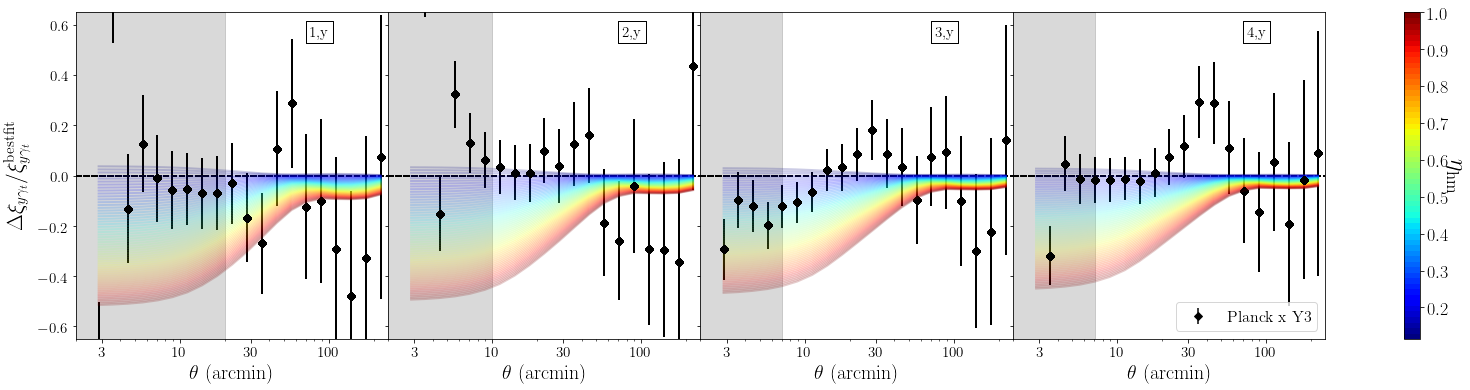

In [96]:
import matplotlib as mpl
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fdir = '/global/cfs/cdirs/des/data_actxdes/'
import scipy.interpolate as interpolate
ytype = 'planck'
cosmotype = 'PL'
# cosmotype = 'DES'
do_residuals = 1
show_1h2h = 0
show_chi2 = 0
    
labels = ['Planck Cosmo','DES Cosmo','OWLS AGN']
# labels = ['Mead',r'$R_{\rm max}/R_{\rm 200c} = 3$',r'$R_{\rm max}/R_{\rm 200c} = 2$']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax_all = pl.subplots(1,4, figsize = (28,6),sharex=True,sharey='row',gridspec_kw = {'wspace':0.0, 'hspace':0.0})
df1 = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/param_grid/save_gty_etahmgrid.pk','rb'))   
ahm_v = np.array(list(df1.keys()))[1:]
# ahm_fid = 0.402956417083746
ahm_fid =0.151492156293947
# ahm_fid = -0.276997957770443
# ahm_fid = 0.518187061074332

ind_fid = np.where(ahm_v > ahm_fid)[0][0]
theta_array = df1[ahm_v[0]]['theta']

cmap = plt.get_cmap('jet',len(ahm_v))
for j1 in range(1):
    ax = ax_all
 
    if j1 == 1:        
        yt = 2
        from astropy.io import fits
        actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

        bin1_gty = actf['compton1_shear'].data['BIN1']
        bin2_gty = actf['compton1_shear'].data['BIN2']
        gty_csf = actf['compton1_shear'].data['VALUE']
        gty_ang = actf['compton1_shear'].data['ANG']
        gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[480:])
        gty_cov = actf['COVMAT'].data[480:,:][:,480:]
        label_yx = 'ACT x Y3'
        ylims = [-1.2,1.2]
        sc = [20,10,1.1,1.1]
        mss = 's'

    if j1 == 0:
        yt = 1
        from astropy.io import fits
        actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

        bin1_gty = actf['compton_shear'].data['BIN1']
        bin2_gty = actf['compton_shear'].data['BIN2']
        gty_csf = actf['compton_shear'].data['VALUE']
        gty_ang = actf['compton_shear'].data['ANG']
        gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[400:480])
        gty_cov = actf['COVMAT'].data[400:480,:][:,400:480]
        label_yx = 'Planck x Y3'
        ylims = [-0.65,0.65]
        mss = 'D'

        sc = [20,10,7.1,7.1]

    
    for j2 in range(4):
        for jf in range(len(ahm_v)):
            color =cmap(jf)
            DVj = df1[ahm_v[jf]]
            jc = 0
            texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
            texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
            bin_str = 'yt_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
            
            Cl_j1_tot = DVj[bin_str]
            
#             theta_jfb = dfb['dv'][0][j1]['theta']
#             Cl_jfb_tot = dfb['dv'][0][j1]['bin_' + str(j2+1) + '_' + str(0)]['tot']
            
            sel_ind = np.where((bin1_gty == j2+1) & (bin2_gty == j2+1))[0]

            yk_g = gty_csf[sel_ind]
            yk_th_g = gty_ang[sel_ind]
            yk_err = gty_sig[sel_ind]
            cov_bin = gty_cov[sel_ind,:][:,sel_ind]
            inv_cov_bin = np.linalg.inv(cov_bin)


            if do_residuals:
                if jf == 0:
                    DVj = df1[ahm_v[ind_fid]]
                    bin_str = 'yt_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
                    Cl_fid_tot = DVj[bin_str]
                    Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_fid_tot),fill_value='extrapolate')
                    Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
                    Cl_d_th_ref = Cl_d_th
                Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')
                Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
                
                if jf == 0:
                    ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker=mss,color='black',label=label_yx)
                else:
                    ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker=mss,color='black')


                ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =color,alpha=0.2)  
                        
            else:
                if jf == 0:
                    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label=label_yx)
                else:
                    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')


                ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =color)  
            
            if jf == 0:
                ax[j2].axvspan(0,sc[j2],alpha=0.15,color='k')
            ax[j2].set_xscale('log')

            if do_residuals:
#                 print(ylims)
                ax[j2].set_ylim(ylims) 
                ax[j2].axhline(0.0,ls='--',color='k')
            else:
                ax[j2].set_yscale('log')
                ax[j2].set_ylim(1e-11,2e-9)

            if j1 == 0:
                ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([3,10,30,100])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

            ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
            ax[j2].tick_params(axis='both', which='major', labelsize=15)
            ax[j2].set_xlim((2,250))
            ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


            jc += 1

        # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
        if do_residuals:
            ax[0].set_ylabel(r'$\Delta \xi_{y\gamma_t}/\xi^{\rm bestfit}_{y\gamma_t}$ ', size = 22)
        else:
            ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
        # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
        # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
        ax[3].legend(fontsize=16,loc='lower right')
    #     ax[1].legend(fontsize=15,loc='lower left')
        #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

norm = mpl.colors.Normalize(vmin=np.amin(ahm_v),vmax=np.amax(ahm_v))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# plt.colorbar(sm, ticks=np.linspace(0,2,N), 
#              boundaries=np.arange(-0.05,2.1,.1))

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# cbar = fig.colorbar(sm, cax=cbar_ax)
cbar = fig.colorbar(sm, ax=ax_all.ravel().tolist())
# cbar = fig.colorbar(sm, orientation="horizontal", pad=0.2)
cbar.ax.get_yaxis().labelpad = 15
# cbar.ax.set_ylabel(r'$A_{\rm hm}$', rotation=270,size=24)
cbar.ax.set_ylabel(r'$\eta_{\rm hm}$', rotation=270,size=24)
# cbar.ax.set_ylabel(r'$A_{\rm IA}$', rotation=270,size=24)
# cbar.ax.set_ylabel(r'$A_{\rm IA}$', rotation=270,size=24)
# pl.tight_layout()

# fig.savefig('gty_residual_vary_cosmo_varyP_' + str(cosmotype) + '.pdf')






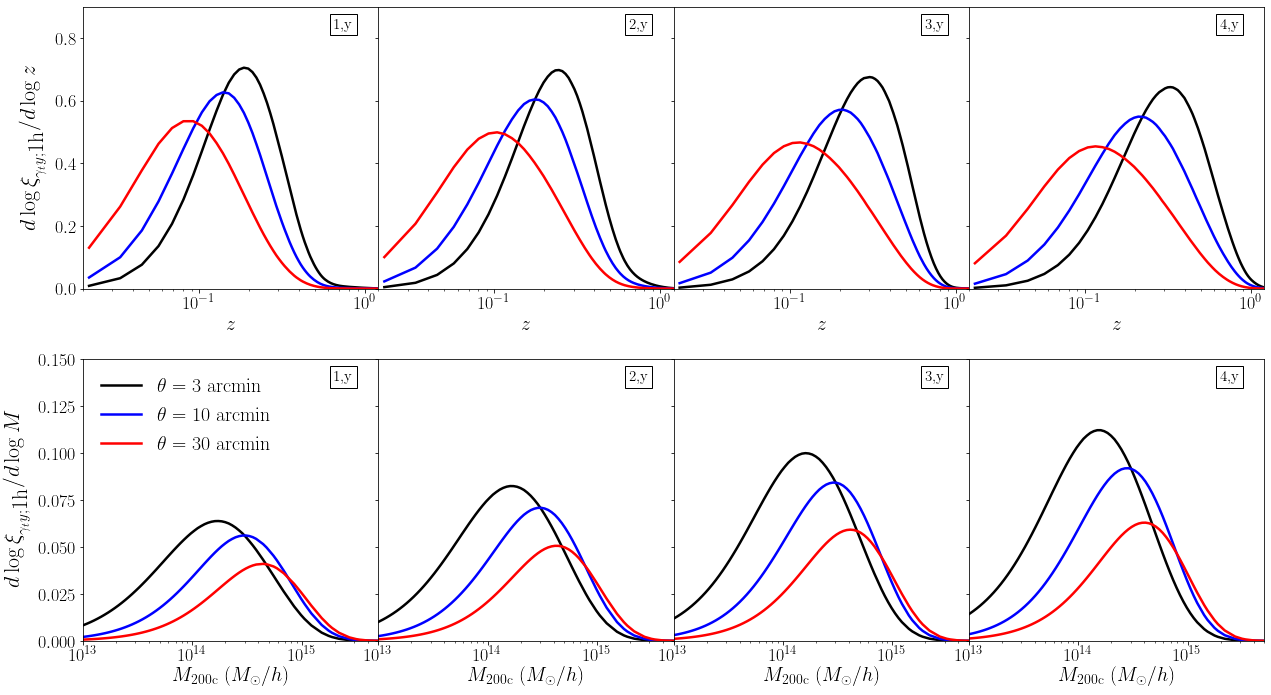

In [11]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fdir = '/global/cfs/cdirs/des/data_actxdes/'
import scipy.interpolate as interpolate
# ytype = 'planck'
ytype = 'act'
do_residuals = 1
show_1h2h = 1
show_chi2 = 1

if ytype == 'act':
    fnames = [
        'DV_logsens_zM.pk',
    ]
    yt = 2


if ytype == 'planck':
    fnames = [
        'DV_logsens_zM.pk',
    ]
    yt = 1

    
labels = ['Best Fit','OWLS Ref','OWLS AGN']
# labels = ['Mead',r'$R_{\rm max}/R_{\rm 200c} = 3$',r'$R_{\rm max}/R_{\rm 200c} = 2$']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (18,10),sharex='row',sharey='row', gridspec_kw = {'wspace':0})
# thbin = 2
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j2 in range(4):
    for jf in range(len(fnames)):

        DV = dill.load(open(fdir + fnames[jf],'rb'))  

        jc = 0
        texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
        texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
        bin_strz = 'sensz_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
        bin_strM = 'sensM_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
        sensz = DV.xi_gty_log_sens_zM[bin_strz]
        sensM = DV.xi_gty_log_sens_zM[bin_strM]
        M_array = DV.xi_gty_log_sens_zM['M_array']
        z_array = DV.xi_gty_log_sens_zM['z_array']
        theta_array = DV.xi_gty_log_sens_zM['theta']
        thbin = np.where(theta_array > 3)[0][0]
        ax[0,j2].errorbar(z_array, sensz[thbin,:], lw=2.5, ls='-',marker='',color='black',label=r'$\theta = 3$ arcmin')
        ind_not_nan = np.argwhere(~np.isnan(sensM[thbin,:]))
        ax[1,j2].errorbar(M_array[ind_not_nan], sensM[thbin,ind_not_nan], lw=2.5,ls='-',marker='',color='black',label=r'$\theta = 3$ arcmin')

        thbin = np.where(theta_array > 10)[0][0]
        ax[0,j2].errorbar(z_array, sensz[thbin,:], lw=2.5,ls='-',marker='',color='blue',label=r'$\theta = 10$ arcmin')
        ind_not_nan = np.argwhere(~np.isnan(sensM[thbin,:]))
        ax[1,j2].errorbar(M_array[ind_not_nan], sensM[thbin,ind_not_nan],lw=2.5, ls='-',marker='',color='blue',label=r'$\theta = 10$ arcmin')

        thbin = np.where(theta_array > 30)[0][0]
        ax[0,j2].errorbar(z_array, sensz[thbin,:], lw=2.5,ls='-',marker='',color='r',label=r'$\theta = 30$ arcmin')
        ind_not_nan = np.argwhere(~np.isnan(sensM[thbin,:]))
        ax[1,j2].errorbar(M_array[ind_not_nan], sensM[thbin,ind_not_nan],lw=2.5, ls='-',marker='',color='r',label=r'$\theta = 30$ arcmin')

        ax[0,j2].text( 0.85, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.85, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    

        
        ax[0,j2].set_xscale('log')
        ax[1,j2].set_xscale('log')

        ax[0,j2].set_xlabel(r'$z$', size = 20)
        ax[1,j2].set_xlabel(r'$M_{\rm 200c}$ ($M_{\odot}/h$)', size = 20)
        ax[0,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[1,j2].tick_params(axis='both', which='major', labelsize=18)
        jc += 1

    ax[0,0].set_ylabel(r'$d \log \xi_{\gamma_t y; \textrm{1h}}/d \log z$ ', size = 22)
    ax[1,0].set_ylabel(r'$d \log \xi_{\gamma_t y; \textrm{1h}}/d \log M$ ', size = 22)
    ax[0,0].set_ylim(0.0,0.9)
    ax[0,0].set_xlim(2e-2,1.2)
    ax[1,0].set_ylim(0.0,0.15)
    ax[1,0].set_xlim(1e13,5e15)
ax[1,0].legend(fontsize=20,loc='upper left',frameon=False)
pl.tight_layout()

fig.savefig('xigty_sens_zM' + '.pdf')




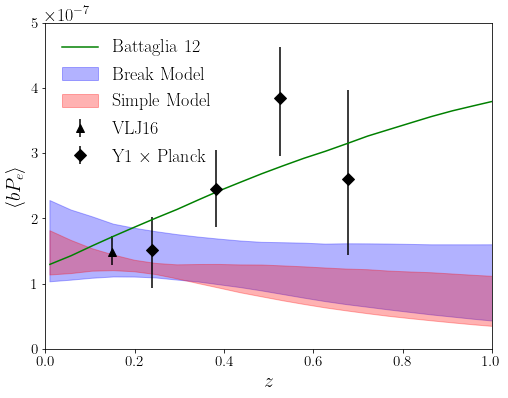

In [33]:
# pl.rc('text', usetex=False)
df1 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
df2 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.pk','rb'))  

percentiles = [16.0, 84.0]

colors = ['blue']
alpha_list = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2]
labels = [r'Data']
linestyles = ['-']


fig, ax = pl.subplots(1, 1, figsize=(8, 6))
ax.fill_between(df1['z'], df1['bPe_low']*(1e-3), df1['bPe_high']*(1e-3), color='blue', alpha=alpha_list[0], label = 'Break Model')
ax.fill_between(df2['z'], df2['bPe_low']*(1e-3), df2['bPe_high']*(1e-3), color='red', alpha=alpha_list[0], label = 'Simple Model')
ax.plot(df1['z'], df1['bPe_fid']*(1e-3), color='green', alpha=1.0, label = 'Battaglia 12')
vljv = 1.49e-7
ax.errorbar([0.149],[vljv],np.array([[vljv-1.28e-7,1.73e-7 - vljv]]).T,ls='',marker='^',ms='8',color='k',label='VLJ16')
vljv = 1.512e-7
ax.errorbar([0.239],[vljv],np.array([[vljv-0.9367e-7,2.025e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k',label=r'Y1 $\times$ Planck')
vljv = 2.45e-7
ax.errorbar([0.383],[vljv],np.array([[vljv-1.87e-7,3.04e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 3.85e-7
ax.errorbar([0.525],[vljv],np.array([[vljv-2.95e-7,4.62e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 2.6e-7
ax.errorbar([0.678],[vljv],np.array([[vljv-1.44e-7,3.97e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')

ax.set_xlabel(r'$z$', size=20)
ax.set_ylabel(r'$\langle bP_e \rangle$', size=20)
ax.set_xlim(0.0,1.0)
ax.set_ylim(0.0,5e-7)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)


legend = ax.legend(fontsize=18, frameon=False, loc = 'upper left')
# fig.savefig('YM_buzzard_try.pdf')
# fig.savefig(save_plot_fname)




In [20]:
# pl.rc('text', usetex=False)
df1 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
df2 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.pk','rb'))  

def weighted_percentile(data_mat, percents, weights=None):
    weighted_mat = np.zeros(data_mat.shape[1])
    for mj in range(data_mat.shape[1]):
        data = data_mat[:, mj]
        if weights is None:
            return np.percentile(data, percents)
        ind=np.argsort(data)
        d=data[ind]
        w=weights[ind]
        p=1.*w.cumsum()/w.sum()*100
        y=np.interp(percents, p, d)
        weighted_mat[mj] = y
    return weighted_mat

def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples
chainfname = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_2hcuts_delz_m_bP_PLcosmo_finalrun3.txt'
chainf = np.loadtxt(chainfname)
print(chainf.shape)
bpz0 = chainf[:,-7]
bpalpha = chainf[:,-6]
nsample = get_nsample(chainfname)
weights = chainf[:,-1]
percentiles = [16.0, 84.0]
z_array = df1['z']
bp_mat = np.zeros((nsample,len(z_array)))
for js in range(nsample):
    bp_mat[js,:] = bpz0[js] + bpalpha[js] * z_array
bPe_low_2h = weighted_percentile(bp_mat, percentiles[0], weights=weights)
bPe_high_2h = weighted_percentile(bp_mat, percentiles[1], weights=weights)


    

(760, 15)


In [30]:
chainfname = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_2hcuts_delz_m_bP_DEScosmo_finalrun3.txt'
chainf = np.loadtxt(chainfname)  
bpz0 = chainf[:,-7]
bpalpha = chainf[:,-6]
nsample = get_nsample(chainfname)
weights = chainf[:,-1]
percentiles = [16.0, 84.0]
z_array = df1['z']
bp_mat = np.zeros((nsample,len(z_array)))
for js in range(nsample):
    bp_mat[js,:] = bpz0[js] + bpalpha[js] * z_array
bPe_low_2h_DES = weighted_percentile(bp_mat, percentiles[0], weights=weights)
bPe_high_2h_DES = weighted_percentile(bp_mat, percentiles[1], weights=weights)



In [31]:
chainfname = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_2hcuts_delz_m_bP_Y1RMPLcosmo_finalrun3.txt'
chainf = np.loadtxt(chainfname)  
bpz0 = chainf[:,-7]
bpalpha = chainf[:,-6]
nsample = get_nsample(chainfname)
weights = chainf[:,-1]
percentiles = [16.0, 84.0]
z_array = df1['z']
bp_mat = np.zeros((nsample,len(z_array)))
for js in range(nsample):
    bp_mat[js,:] = bpz0[js] + bpalpha[js] * z_array
bPe_low_2h_Y1RMPL = weighted_percentile(bp_mat, percentiles[0], weights=weights)
bPe_high_2h_Y1RMPL = weighted_percentile(bp_mat, percentiles[1], weights=weights)



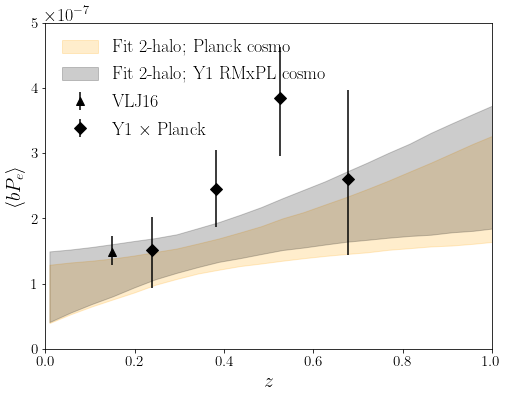

In [70]:

percentiles = [16.0, 84.0]

colors = ['blue']
alpha_list = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2]
labels = [r'Data']
linestyles = ['-']


fig, ax = pl.subplots(1, 1, figsize=(8, 6))
# ax.fill_between(df1['z'], df1['bPe_low']*(1e-3), df1['bPe_high']*(1e-3), color='blue', alpha=alpha_list[0], label = 'Break Model')
# ax.fill_between(df2['z'], df2['bPe_low']*(1e-3), df2['bPe_high']*(1e-3), color='red', alpha=alpha_list[0], label = 'Simple Model')
ax.fill_between(df2['z'], bPe_low_2h*(1e-7), bPe_high_2h*(1e-7), color='orange', alpha=0.2, label = 'Fit 2-halo; Planck cosmo')
# ax.fill_between(df2['z'], bPe_low_2h_DES*(1e-7), bPe_high_2h_DES*(1e-7), color='black', alpha=0.2, label = 'Fit 2-halo; DES cosmo')
ax.fill_between(df2['z'], bPe_low_2h_Y1RMPL*(1e-7), bPe_high_2h_Y1RMPL*(1e-7), color='black', alpha=0.2, label = 'Fit 2-halo; Y1 RMxPL cosmo')
# ax.plot(df1['z'], df1['bPe_fid']*(1e-3), color='green', alpha=1.0, label = 'Battaglia 12')
vljv = 1.49e-7
ax.errorbar([0.149],[vljv],np.array([[vljv-1.28e-7,1.73e-7 - vljv]]).T,ls='',marker='^',ms='8',color='k',label='VLJ16')
vljv = 1.512e-7
ax.errorbar([0.239],[vljv],np.array([[vljv-0.9367e-7,2.025e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k',label=r'Y1 $\times$ Planck')
vljv = 2.45e-7
ax.errorbar([0.383],[vljv],np.array([[vljv-1.87e-7,3.04e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 3.85e-7
ax.errorbar([0.525],[vljv],np.array([[vljv-2.95e-7,4.62e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 2.6e-7
ax.errorbar([0.678],[vljv],np.array([[vljv-1.44e-7,3.97e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')

ax.set_xlabel(r'$z$', size=20)
ax.set_ylabel(r'$\langle bP_e \rangle$', size=20)
ax.set_xlim(0.0,1.0)
ax.set_ylim(0.0,5e-7)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)


legend = ax.legend(fontsize=18, frameon=False, loc = 'upper left')
# fig.savefig('YM_buzzard_try.pdf')
# fig.savefig(save_plot_fname)




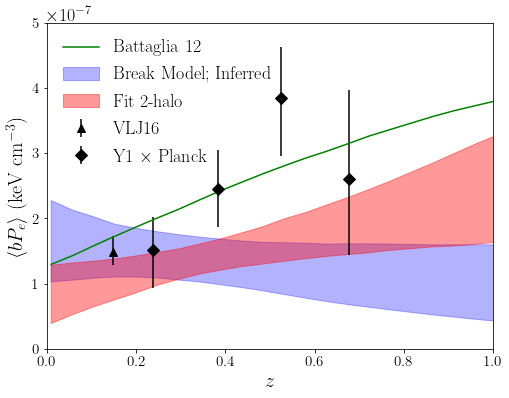

In [50]:
# pl.rc('text', usetex=False)
dfo1 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
dfo2 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.pk','rb'))  

percentiles = [16.0, 84.0]

colors = ['blue']
alpha_list = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2]
labels = [r'Data']
linestyles = ['-']


fig, ax = pl.subplots(1, 1, figsize=(8, 6))
ax.fill_between(dfo1['z'], dfo1['bPe_low']*(1e-3), dfo1['bPe_high']*(1e-3), color='blue', alpha=alpha_list[0], label = 'Break Model; Inferred')
ax.fill_between(df2['z'], bPe_low_2h*(1e-7), bPe_high_2h*(1e-7), color='red', alpha=0.4, label = 'Fit 2-halo')
# ax.fill_between(dfo2['z'], dfo2['bPe_low']*(1e-3), dfo2['bPe_high']*(1e-3), color='red', alpha=alpha_list[0], label = 'Simple Model')
ax.plot(dfo1['z'], dfo1['bPe_fid']*(1e-3), color='green', alpha=1.0, label = 'Battaglia 12')
vljv = 1.49e-7
ax.errorbar([0.149],[vljv],np.array([[vljv-1.28e-7,1.73e-7 - vljv]]).T,ls='',marker='^',ms='8',color='k',label='VLJ16')
vljv = 1.512e-7
ax.errorbar([0.239],[vljv],np.array([[vljv-0.9367e-7,2.025e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k',label=r'Y1 $\times$ Planck')
vljv = 2.45e-7
ax.errorbar([0.383],[vljv],np.array([[vljv-1.87e-7,3.04e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 3.85e-7
ax.errorbar([0.525],[vljv],np.array([[vljv-2.95e-7,4.62e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 2.6e-7
ax.errorbar([0.678],[vljv],np.array([[vljv-1.44e-7,3.97e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')

ax.set_xlabel(r'$z$', size=20)
ax.set_ylabel(r'$\langle bP_e \rangle$ (keV ${\rm cm}^{-3}$)', size=20)
ax.set_xlim(0.0,1.0)
ax.set_ylim(0.0,5e-7)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)


legend = ax.legend(fontsize=18, frameon=False, loc = 'upper left')
fig.savefig('bPe_comparison.pdf')
# fig.savefig(save_plot_fname)




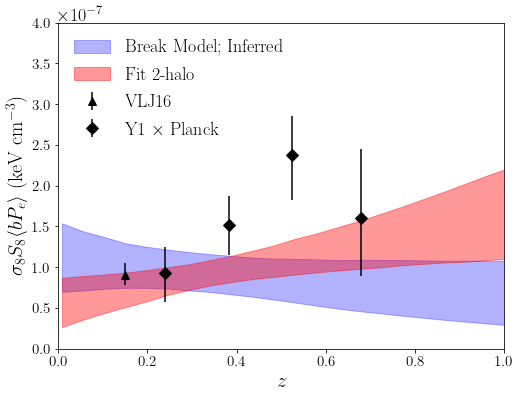

In [54]:
# pl.rc('text', usetex=False)
dfo1 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
dfo2 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.pk','rb'))  

percentiles = [16.0, 84.0]

colors = ['blue']
alpha_list = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2]
labels = [r'Data']
linestyles = ['-']

#    Om0 = 0.315
#    sigma8 = 0.811
sig8 = 0.811
S8 = sig8*((0.315/0.3)**(0.5))
fig, ax = pl.subplots(1, 1, figsize=(8, 6))
ax.fill_between(dfo1['z'], (sig8*S8)*dfo1['bPe_low']*(1e-3), (sig8*S8)*dfo1['bPe_high']*(1e-3), color='blue', alpha=alpha_list[0], label = 'Break Model; Inferred')
ax.fill_between(df2['z'], (sig8*S8)*bPe_low_2h*(1e-7), (sig8*S8)*bPe_high_2h*(1e-7), color='red', alpha=0.4, label = 'Fit 2-halo')
# ax.fill_between(dfo2['z'], dfo2['bPe_low']*(1e-3), dfo2['bPe_high']*(1e-3), color='red', alpha=alpha_list[0], label = 'Simple Model')
# ax.plot(dfo1['z'], (sig8*S8)*dfo1['bPe_fid']*(1e-3), color='green', alpha=1.0, label = 'Battaglia 12')
sig8 = 0.8
S8 = sig8*((0.27/0.3)**(0.5))
vljv = 1.49e-7
ax.errorbar([0.149],(sig8*S8)*np.array([vljv]),(sig8*S8)*np.array([[vljv-1.28e-7,1.73e-7 - vljv]]).T,ls='',marker='^',ms='8',color='k',label='VLJ16')
sig8 = 0.8
S8 = sig8*((0.28/0.3)**(0.5))
vljv = 1.512e-7
ax.errorbar([0.239],(sig8*S8)*np.array([vljv]),(sig8*S8)*np.array([[vljv-0.9367e-7,2.025e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k',label=r'Y1 $\times$ Planck')
vljv = 2.45e-7
ax.errorbar([0.383],(sig8*S8)*np.array([vljv]),(sig8*S8)*np.array([[vljv-1.87e-7,3.04e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 3.85e-7
ax.errorbar([0.525],(sig8*S8)*np.array([vljv]),(sig8*S8)*np.array([[vljv-2.95e-7,4.62e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 2.6e-7
ax.errorbar([0.678],(sig8*S8)*np.array([vljv]),(sig8*S8)*np.array([[vljv-1.44e-7,3.97e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')

ax.set_xlabel(r'$z$', size=20)
ax.set_ylabel(r'$\sigma_8 S_8 \langle bP_e \rangle$ (keV ${\rm cm}^{-3}$)', size=20)
ax.set_xlim(0.0,1.0)
ax.set_ylim(0.0,4e-7)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)


legend = ax.legend(fontsize=18, frameon=False, loc = 'upper left')
fig.savefig('bPe_comparison_rs.pdf')
# fig.savefig(save_plot_fname)




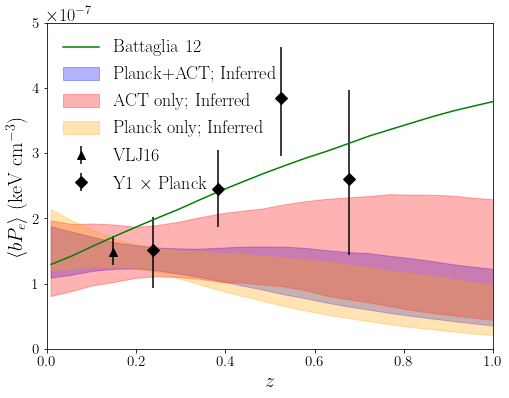

In [63]:
# pl.rc('text', usetex=False)
dfo1 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
dfo2 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_gtyACTonly_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
dfo3 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_gtyPLonly_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  

percentiles = [16.0, 84.0]

colors = ['blue']
alpha_list = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2]
labels = [r'Data']
linestyles = ['-']


fig, ax = pl.subplots(1, 1, figsize=(8, 6))
ax.fill_between(dfo1['z'], dfo1['bPe_low']*(1e-3), dfo1['bPe_high']*(1e-3), color='blue', alpha=alpha_list[0], label = 'Planck+ACT; Inferred')
ax.fill_between(dfo2['z'], dfo2['bPe_low']*(1e-3), dfo2['bPe_high']*(1e-3), color='red', alpha=alpha_list[0], label = 'ACT only; Inferred')
ax.fill_between(dfo3['z'], dfo3['bPe_low']*(1e-3), dfo3['bPe_high']*(1e-3), color='orange', alpha=alpha_list[0], label = 'Planck only; Inferred')
# ax.fill_between(dfo2['z'], dfo2['bPe_low']*(1e-3), dfo2['bPe_high']*(1e-3), color='red', alpha=alpha_list[0], label = 'Simple Model')
ax.plot(dfo1['z'], dfo1['bPe_fid']*(1e-3), color='green', alpha=1.0, label = 'Battaglia 12')
vljv = 1.49e-7
ax.errorbar([0.149],[vljv],np.array([[vljv-1.28e-7,1.73e-7 - vljv]]).T,ls='',marker='^',ms='8',color='k',label='VLJ16')
vljv = 1.512e-7
ax.errorbar([0.239],[vljv],np.array([[vljv-0.9367e-7,2.025e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k',label=r'Y1 $\times$ Planck')
vljv = 2.45e-7
ax.errorbar([0.383],[vljv],np.array([[vljv-1.87e-7,3.04e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 3.85e-7
ax.errorbar([0.525],[vljv],np.array([[vljv-2.95e-7,4.62e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 2.6e-7
ax.errorbar([0.678],[vljv],np.array([[vljv-1.44e-7,3.97e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')

ax.set_xlabel(r'$z$', size=20)
ax.set_ylabel(r'$\langle bP_e \rangle$ (keV ${\rm cm}^{-3}$)', size=20)
ax.set_xlim(0.0,1.0)
ax.set_ylim(0.0,5e-7)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)


legend = ax.legend(fontsize=18, frameon=False, loc = 'upper left')
# fig.savefig('bPe_comparison.pdf')
# fig.savefig(save_plot_fname)




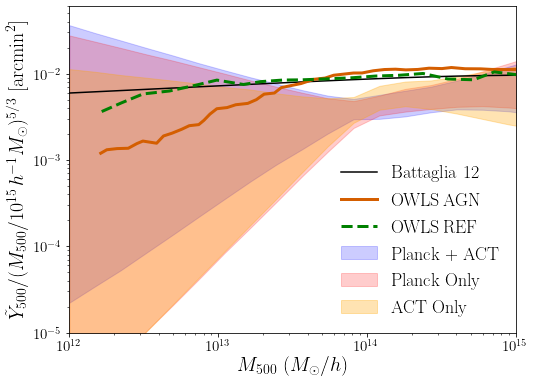

In [44]:
# pl.rc('text', usetex=False)
df1 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/YM_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
df2 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/YM_plot_data_xipm_gtyPLonly_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
df3 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/YM_plot_data_xipm_gtyACTonly_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
percentiles = [16.0, 84.0]
z = 0.25
h = 0.7
ym_agn8_data = np.genfromtxt('YM_AGN8.dat', delimiter = ',')
ym_agn85_data = np.genfromtxt('YM_AGN8.5.dat', delimiter = ',')
ym_ref_data = np.genfromtxt('YM_REF.dat', delimiter = ',')
colors = ['blue']
alpha_list = [0.2, 0.2, 0.3, 0.2, 0.2, 0.2]
labels = [r'Data']
linestyles = ['-']
scaling = (df1['M']/1.0e15)**(-5./3.)  

fig, ax = pl.subplots(1, 1, figsize=(8, 6))
ax.fill_between(df1['M'], df1['YM_low']*scaling, df1['YM_high']*scaling, color='blue', alpha=alpha_list[0], label = 'Planck + ACT')
ax.fill_between(df2['M'], df2['YM_low']*scaling, df2['YM_high']*scaling, color='red', alpha=alpha_list[1], label = 'Planck Only')
ax.fill_between(df3['M'], df3['YM_low']*scaling, df3['YM_high']*scaling, color='orange', alpha=alpha_list[2], label = 'ACT Only')

ax.plot(df1['M'], df1['YM_fid']*scaling, color='k', alpha=1.0, label = 'Battaglia 12')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M_{\rm 500} \ (M_{\odot}/h)$', size=20)

ax.set_ylabel(r'$ \tilde{Y}_{500} / (M_{500}/10^{15} \,h^{-1} M_{\odot} )^{5/3} \ [\rm{arcmin}^2 ]$', size=20)


ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

Colors = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']

if (0):
    ax.plot(ym_agn8_data[:,0]*h, ym_agn8_data[:,1], label = r'${\rm OWLS \, AGN}$', lw = 2, color  = Colors[0])
#     ax.plot(ym_agn85_data[:,0]*h, ym_agn85_data[:,1], label =  r'${\rm AGN8.5}$', lw = 2, ls = 'dashed', color = Colors[1])
    ax.plot(ym_ref_data[:,0]*h, ym_ref_data[:,1], label =  r'${\rm OWLS \, REF}$', lw = 2, ls = 'dotted', color = Colors[2])
if (1):
    ax.plot(ym_agn8_data[:,0]*h, ym_agn8_data[:,1]/(ym_agn8_data[:,0]*h/1.0e15)**(5./3.), label = r'${\rm OWLS \, AGN}$', lw = 3, color  = Colors[2])
#     ax.plot(ym_agn85_data[:,0]*h, ym_agn85_data[:,1]/(ym_agn85_data[:,0]*h/1.0e15)**(5/3.), label =  r'${\rm AGN8.5}$', lw = 3, ls = 'dashed', color = Colors[1])
    ax.plot(ym_ref_data[:,0]*h, ym_ref_data[:,1]/(ym_ref_data[:,0]*h/1.0e15)**(5./3.), label =  r'${\rm OWLS \, REF}$', lw = 3, ls = 'dashed', color = 'green')

ax.set_xlim((1.0e12, 1.0e15))
ax.set_ylim(1e-5,6e-2)
legend = ax.legend(fontsize=18, frameon=False, loc = 'lower right')
fig.savefig('YM_break_model_consistency.pdf')




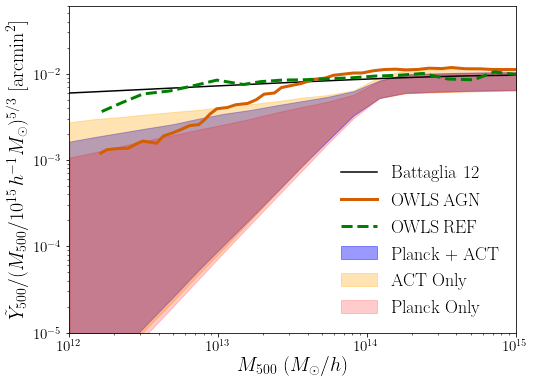

In [78]:
# pl.rc('text', usetex=False)
df1 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/YM_plot_data_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
df2 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/YM_plot_data_gtyPLonly_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
df3 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/YM_plot_data_gtyACTonly_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
percentiles = [16.0, 84.0]
z = 0.25
h = 0.7
ym_agn8_data = np.genfromtxt('YM_AGN8.dat', delimiter = ',')
ym_agn85_data = np.genfromtxt('YM_AGN8.5.dat', delimiter = ',')
ym_ref_data = np.genfromtxt('YM_REF.dat', delimiter = ',')
colors = ['blue']
alpha_list = [0.4, 0.2, 0.3, 0.2, 0.2, 0.2]
labels = [r'Data']
linestyles = ['-']
scaling = (df1['M']/1.0e15)**(-5./3.)  

fig, ax = pl.subplots(1, 1, figsize=(8, 6))
ax.fill_between(df1['M'], df1['YM_low']*scaling, df1['YM_high']*scaling, color='blue', alpha=alpha_list[0], label = 'Planck + ACT')
ax.fill_between(df3['M'], df3['YM_low']*scaling, df3['YM_high']*scaling, color='orange', alpha=alpha_list[2], label = 'ACT Only')
ax.fill_between(df2['M'], df2['YM_low']*scaling, df2['YM_high']*scaling, color='red', alpha=alpha_list[1], label = 'Planck Only')


ax.plot(df1['M'], df1['YM_fid']*scaling, color='k', alpha=1.0, label = 'Battaglia 12')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M_{\rm 500} \ (M_{\odot}/h)$', size=20)

ax.set_ylabel(r'$ \tilde{Y}_{500} / (M_{500}/10^{15} \,h^{-1} M_{\odot} )^{5/3} \ [\rm{arcmin}^2 ]$', size=20)


ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

Colors = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']

if (0):
    ax.plot(ym_agn8_data[:,0]*h, ym_agn8_data[:,1], label = r'${\rm OWLS \, AGN}$', lw = 3, color  = Colors[0])
#     ax.plot(ym_agn85_data[:,0]*h, ym_agn85_data[:,1], label =  r'${\rm AGN8.5}$', lw = 2, ls = 'dashed', color = Colors[1])
    ax.plot(ym_ref_data[:,0]*h, ym_ref_data[:,1], label =  r'${\rm OWLS \, REF}$', lw = 2, ls = 'dotted', color = Colors[2])
if (1):
    ax.plot(ym_agn8_data[:,0]*h, ym_agn8_data[:,1]/(ym_agn8_data[:,0]*h/1.0e15)**(5./3.), label = r'${\rm OWLS \, AGN}$', lw = 3, color  = Colors[2])
#     ax.plot(ym_agn85_data[:,0]*h, ym_agn85_data[:,1]/(ym_agn85_data[:,0]*h/1.0e15)**(5/3.), label =  r'${\rm AGN8.5}$', lw = 3, ls = 'dashed', color = Colors[1])
    ax.plot(ym_ref_data[:,0]*h, ym_ref_data[:,1]/(ym_ref_data[:,0]*h/1.0e15)**(5./3.), label =  r'${\rm OWLS \, REF}$', lw = 3, ls = 'dashed', color = 'green')

ax.set_xlim((1.0e12, 1.0e15))
ax.set_ylim(1e-5,6e-2)
legend = ax.legend(fontsize=18, frameon=False, loc = 'lower right')
fig.savefig('YM_break_model_consistency_P0A_P0z_betaA_alphigh.pdf')




In [23]:
dfP = pk.load(open('Pe_plot_data_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
# {'z':z_array, 'M_mat':M_mat,'x_array':x_array,'Pe_fid':Pe_fid,'Pe_mat':Pe_mat}
# dfP.keys()
z_array, M_mat, x_array, Pe_fid, Pe_mat, weights = dfP['z'], dfP['M_mat'], dfP['x_array'], dfP['Pe_fid'], dfP['Pe_mat'], dfP['weights']   



In [24]:
def weighted_percentile(data_mat, percents, weights=None):
    weighted_mat = np.zeros(data_mat.shape[1])
    for mj in range(data_mat.shape[1]):
        data = data_mat[:, mj]
        if weights is None:
            return np.percentile(data, percents)
        ind=np.argsort(data)
        d=data[ind]
        w=weights[ind]
        p=1.*w.cumsum()/w.sum()*100
        y=np.interp(percents, p, d)
        weighted_mat[mj] = y
    return weighted_mat


In [25]:
percentiles = [16.0,84.0]
zv = 0.1 
Mv = 5e13
ind_zv = np.where(z_array > zv)[0][0]
ind_Mv = np.where(M_mat[ind_zv,:] > Mv)[0][0]

Pe_fid_j1v1 = Pe_fid[ind_zv, ind_Mv,:]
Pe_mat_j1v1 = Pe_mat[:,ind_zv, ind_Mv,:]
Pe_low_j1v1 = weighted_percentile(Pe_mat_j1v1, percentiles[0], weights=weights)
Pe_high_j1v1 = weighted_percentile(Pe_mat_j1v1, percentiles[1], weights=weights)

zv = 0.4
Mv = 5e13
ind_zv = np.where(z_array > zv)[0][0]
ind_Mv = np.where(M_mat[ind_zv,:] > Mv)[0][0]

Pe_fid_j1v2 = Pe_fid[ind_zv, ind_Mv,:]
Pe_mat_j1v2 = Pe_mat[:,ind_zv, ind_Mv,:]
Pe_low_j1v2 = weighted_percentile(Pe_mat_j1v2, percentiles[0], weights=weights)
Pe_high_j1v2 = weighted_percentile(Pe_mat_j1v2, percentiles[1], weights=weights)


In [26]:
percentiles = [16.0,84.0]
zv = 0.1 
Mv = 1e14
ind_zv = np.where(z_array > zv)[0][0]
ind_Mv = np.where(M_mat[ind_zv,:] > Mv)[0][0]

Pe_fid_j2v1 = Pe_fid[ind_zv, ind_Mv,:]
Pe_mat_j2v1 = Pe_mat[:,ind_zv, ind_Mv,:]
Pe_low_j2v1 = weighted_percentile(Pe_mat_j2v1, percentiles[0], weights=weights)
Pe_high_j2v1 = weighted_percentile(Pe_mat_j2v1, percentiles[1], weights=weights)

zv = 0.4
Mv = 1e14
ind_zv = np.where(z_array > zv)[0][0]
ind_Mv = np.where(M_mat[ind_zv,:] > Mv)[0][0]

Pe_fid_j2v2 = Pe_fid[ind_zv, ind_Mv,:]
Pe_mat_j2v2 = Pe_mat[:,ind_zv, ind_Mv,:]
Pe_low_j2v2 = weighted_percentile(Pe_mat_j2v2, percentiles[0], weights=weights)
Pe_high_j2v2 = weighted_percentile(Pe_mat_j2v2, percentiles[1], weights=weights)


In [27]:
percentiles = [16.0,84.0]
zv = 0.1 
Mv = 5e14
ind_zv = np.where(z_array > zv)[0][0]
ind_Mv = np.where(M_mat[ind_zv,:] > Mv)[0][0]

Pe_fid_j3v1 = Pe_fid[ind_zv, ind_Mv,:]
Pe_mat_j3v1 = Pe_mat[:,ind_zv, ind_Mv,:]
Pe_low_j3v1 = weighted_percentile(Pe_mat_j3v1, percentiles[0], weights=weights)
Pe_high_j3v1 = weighted_percentile(Pe_mat_j3v1, percentiles[1], weights=weights)

zv = 0.4
Mv = 5e14
ind_zv = np.where(z_array > zv)[0][0]
ind_Mv = np.where(M_mat[ind_zv,:] > Mv)[0][0]

Pe_fid_j3v2 = Pe_fid[ind_zv, ind_Mv,:]
Pe_mat_j3v2 = Pe_mat[:,ind_zv, ind_Mv,:]
Pe_low_j3v2 = weighted_percentile(Pe_mat_j3v2, percentiles[0], weights=weights)
Pe_high_j3v2 = weighted_percentile(Pe_mat_j3v2, percentiles[1], weights=weights)


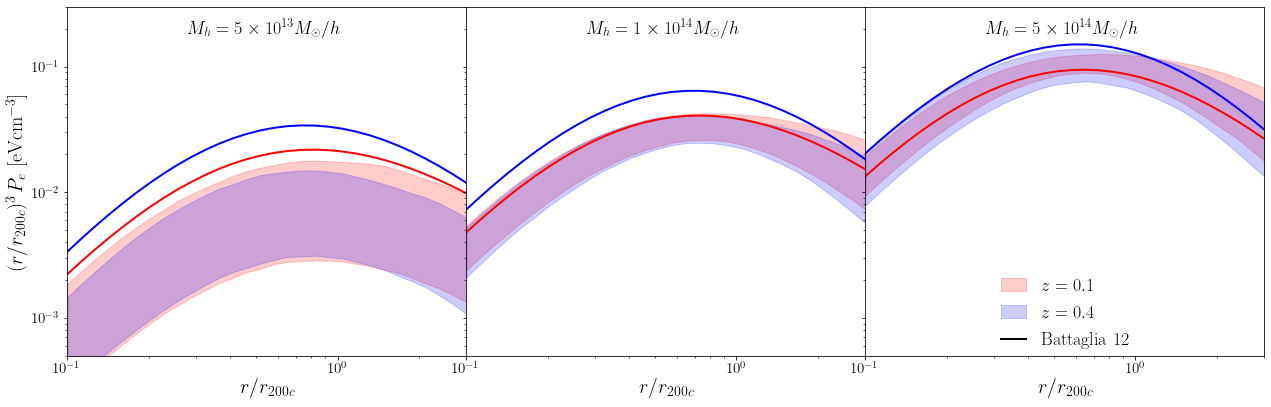

In [31]:
import matplotlib.patches as mpatches

texts_P = [r'$M_{h} = 5\times 10^{13}M_{\odot}/h$',r'$M_{h} = 1\times 10^{14}M_{\odot}/h$',r'$M_{h} = 5\times 10^{14}M_{\odot}/h$']
fig, ax_all = pl.subplots(1, 3, figsize=(18, 6),sharex='row',sharey='row', gridspec_kw = {'wspace':0})
for jp in range(3):
    ax = ax_all[jp]
    if jp == 0:
        Pe_low_jv1, Pe_high_jv1, Pe_fid_jv1 = Pe_low_j1v1, Pe_high_j1v1, Pe_fid_j1v1
        Pe_low_jv2, Pe_high_jv2, Pe_fid_jv2 = Pe_low_j1v2, Pe_high_j1v2, Pe_fid_j1v2
    if jp == 1:
        Pe_low_jv1, Pe_high_jv1, Pe_fid_jv1 = Pe_low_j2v1, Pe_high_j2v1, Pe_fid_j2v1  
        Pe_low_jv2, Pe_high_jv2, Pe_fid_jv2 = Pe_low_j2v2, Pe_high_j2v2, Pe_fid_j2v2
    if jp == 2:
        Pe_low_jv1, Pe_high_jv1, Pe_fid_jv1 = Pe_low_j3v1, Pe_high_j3v1, Pe_fid_j3v1    
        Pe_low_jv2, Pe_high_jv2, Pe_fid_jv2 = Pe_low_j3v2, Pe_high_j3v2, Pe_fid_j3v2
    
    ax.fill_between(x_array,(x_array**3)* Pe_low_jv1, (x_array**3)* Pe_high_jv1, color='red', alpha=0.2, label = r'$z=0.1$')
    ax.plot(x_array, (x_array**3)* Pe_fid_jv1, color='red', alpha=1.0, lw=2.0, label = 'Battaglia 12')

    ax.fill_between(x_array, (x_array**3)* Pe_low_jv2,(x_array**3)*  Pe_high_jv2, color='blue', alpha=0.2, label = r'$z=0.4$')
    ax.plot(x_array, (x_array**3)* Pe_fid_jv2, color='blue', alpha=1.0, lw=2.0)

    ax.set_xlabel(r'$r/r_{200c}$', size=20)
    if jp == 0:
        ax.set_ylabel(r'$(r/r_{200c})^3 \, P_e$ [${\rm eV cm^{-3}}$]', size=20)
    ax.set_xlim(0.1,3.0)
    ax.set_ylim(5e-4,3e-1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text( 0.3, 0.96,texts_P[jp], verticalalignment='top', horizontalalignment='left', transform=ax.transAxes, fontsize=18)    
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
leg_handlers = [ 
    mpatches.Patch(color='red',alpha=0.2),
    mpatches.Patch(color='blue',alpha=0.2),
                 pl.Line2D((0,1),(0,0), color='black', lw=2.0, ls='-'  ) ]
legend_labels = [r'$z=0.1$',r'$z=0.4$',r'Battaglia 12']

# legend for the second plot:
leg = ax_all[2].legend(handles  = leg_handlers,
                   labels   = legend_labels,
                   fontsize = 18, frameon   = False,
                   fancybox = False, edgecolor = 'k', ncol = 1,
                   borderaxespad = 0.0, columnspacing = 2.0, handlelength = 1.4,
                   loc = 'lower center'
                 )
# leg.get_frame().set_linewidth('0.8')
# leg._legend_box.align = 'left'
# ax_all[0].legend(fontsize=18, frameon=False, loc = 'lower right')

pl.tight_layout()
fig.savefig('Pe_const.pdf')
# fig.savefig(save_plot_fname)


In [37]:
import matplotlib
from getdist import plots, MCSamples
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import pdb

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True




def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def get_evidence(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#log_z="):
                logz = float(ln[7:])
    return logz

# def get_param_names(filename):
#     with open(filename,"r") as fi:
#         param_names = np.array((fi.readline()[1:].split())[:-4])
#     print param_names
#     return param_names


def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
#     print param_names
    return param_names


def get_S8(data, names, Omega_m_name = 'cosmological_parameters--omega_m', sigma_8_name = 'COSMOLOGICAL_PARAMETERS--SIGMA_8', alpha=0.5):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [sigma_8_name]):
            sig8_ind = ii
    sigma_8 = data[:,sig8_ind]
    omega_m = data[:,Omega_m_ind]
    s8 = sigma_8 * (omega_m/0.3)**alpha
    return s8


def get_Obh2(data, names, Omega_b_name = 'cosmological_parameters--omega_b', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_b_name]):
            Omega_b_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_b = data[:,Omega_b_ind]
    return omega_b * (h0**2)

def get_Omh3(data, names, Omega_m_name = 'cosmological_parameters--omega_m', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_m = data[:,Omega_m_ind]
    return omega_m * (h0**3)

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)


s8v = 0.82355 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.82355,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97}    
stat_vars = ['cosmological_parameters--omega_m','COSMOLOGICAL_PARAMETERS--SIGMA_8','cosmological_parameters--s8']
def get_mean_std_tension(fname, param_names=stat_vars, truth_dict=marker_dict):
    sf_name = open(fname, 'r')
    lines_all = sf_name.readlines()
    lines = lines_all[3:]
    mean_std = {}
    for j1 in range(len(param_names)):
        for i1 in range(len(lines)):
            first_line = lines[i1]
            first_line_split = first_line.split()
            sec_var = first_line_split[0]
            if sec_var == param_names[j1]:
                mean_std[sec_var] = np.array([float(first_line_split[1]),float(first_line_split[2])])
    out_dic = {}
    for param in param_names:
        mean, std = mean_std[param][0],mean_std[param][1]
        tension = np.abs(mean - truth_dict[param])/std
        out_dic[param] = tension
    
    return mean_std,out_dic

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)




/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  if __name__ == '__main__':


wl_photoz_errors--bias_1: [0.02723448]
wl_photoz_errors--bias_2: [-0.00461761]
wl_photoz_errors--bias_3: [-0.00695365]
wl_photoz_errors--bias_4: [0.00914952]
shear_calibration_parameters--m1: [0.00406968]
shear_calibration_parameters--m2: [-0.00984791]
shear_calibration_parameters--m3: [-0.02641251]
shear_calibration_parameters--m4: [-0.03518174]
halo_model_parameters--a: [1.13729627]
halo_model_parameters--eta_0: [0.30157305]
theory_yx--p0-a_m--0: [26.26143998]
theory_yx--beta-a_m--0: [4.78779111]
theory_yx--p0-alpha_z--0: [-3.25795456]
theory_yx--a_ia--0: [1.14511868]
theory_yx--eta_ia--0: [-2.35765066]
theory_yx--ky_alpha_1h2h_model--1: [0.91645813]
theory_yx--ky_alpha_1h2h_model--2: [0.88153032]
theory_yx--ky_alpha_1h2h_model--3: [0.78504008]
theory_yx--ky_alpha_1h2h_model--4: [0.72020664]
prior: [18.86861887]
post: [-93.32986383]
weight: [0.00188192]
Removed no burn in
nsamp  =  686
data shape =  (686, 7)
weights shape =  (686,)
param names =  ['halo_model_parameters--a' 'halo_mod

<Figure size 1008x756 with 0 Axes>

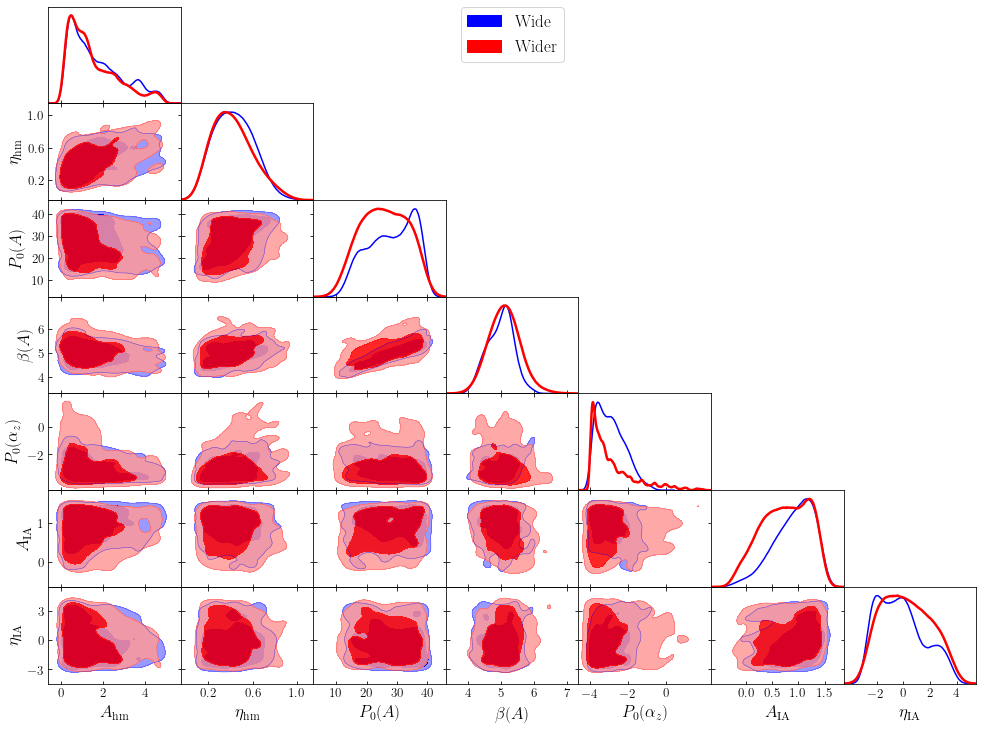

In [5]:
filename_list = [
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_plancky3_b12_p0am_sc_gtyfid_xipxim_all_wide_emcee.txt',  
#                  '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckacty3_b12_p0am_sc_gtyfid_xipxim_all_wide_emcee.txt'
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckacty3_gtyonly_b12_p0am_wz_sc_gtyfid_wide_emcee.txt'
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckacty3_gtyonly_b12_p0am_wz_brokenhigh_sc_gtyfid_wide_emcee.txt', 
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckacty3_gtyonly_b12_p0am_wz_brokenhigh_sc_gtyfid_wider_emcee.txt'
    '/global/cfs/cdirs/des/data_actxdes/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_al1h2h_PLcosmo_finalrun.txt',
    '/global/cfs/cdirs/des/data_actxdes/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1h2h_PLcosmo_finalrun.txt'    
]     
legend_labels = ['Wide','Wider']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$','theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     nsample = get_nsample(filename)
    nsample = int(1*np.loadtxt(filename).shape[0]/2)
    data = np.loadtxt(filename)[-nsample:,:]
#     weights = np.loadtxt(filename)[-nsample:,-1]
    weights = np.ones(nsample)
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = np.loadtxt(filename)[-nsample:,-2]
    ind_max = np.where(likef == np.amax(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,True], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






wl_photoz_errors--bias_1: [0.01219488]
wl_photoz_errors--bias_2: [-0.01758341]
wl_photoz_errors--bias_3: [-0.00375476]
wl_photoz_errors--bias_4: [0.00819151]
shear_calibration_parameters--m1: [-0.00430897]
shear_calibration_parameters--m2: [-0.02076863]
shear_calibration_parameters--m3: [-0.03251222]
shear_calibration_parameters--m4: [-0.03882279]
halo_model_parameters--a: [1.97897671]
halo_model_parameters--eta_0: [0.35908869]
theory_yx--a_ia--0: [-0.1972824]
theory_yx--eta_ia--0: [-1.90698217]
DATA_VECTOR--2PT_CHI2: [338.27359346]
prior: [22.98722723]
like: [-169.13679673]
post: [-146.1495695]
weight: [0.00744678]
Removed no burn in
nsamp  =  903
data shape =  (903, 4)
weights shape =  (903,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--a_ia--0' 'theory_yx--eta_ia--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$A_{\\rm IA}$' '$\\eta_{\\rm IA}$']


<Figure size 1008x756 with 0 Axes>

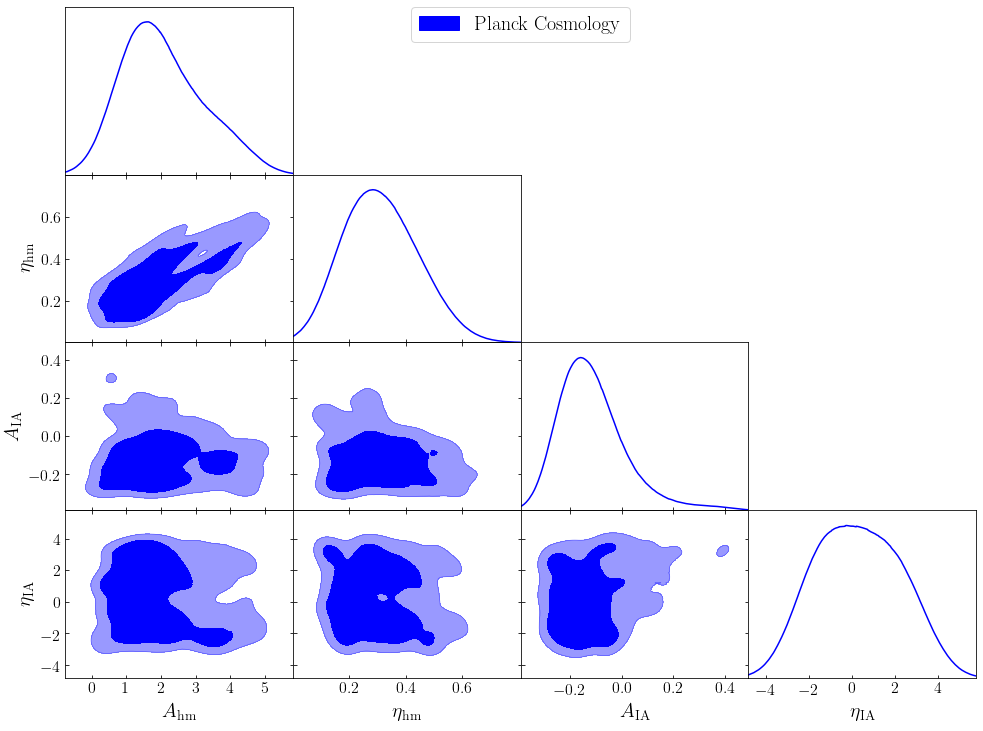

In [8]:
filename_list = [
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_fidcuts_HM_delz_m_IA_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gtyACTonly_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_ACTonly_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt'
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_betaA_PLcosmo_finalrun.txt',        
]     

legend_labels = ['Planck Cosmology','DES Cosmology','ACT only','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






In [9]:
441-116

325

wl_photoz_errors--bias_1: [0.03585495]
wl_photoz_errors--bias_2: [0.01236867]
wl_photoz_errors--bias_3: [0.00037124]
wl_photoz_errors--bias_4: [-0.03418277]
shear_calibration_parameters--m1: [-0.01348677]
shear_calibration_parameters--m2: [-0.02881264]
shear_calibration_parameters--m3: [-0.02323752]
shear_calibration_parameters--m4: [-0.04397332]
theory_yx--bpz0: [1.07898439]
theory_yx--bpalpha: [1.03919142]
DATA_VECTOR--2PT_CHI2: [47.30458378]
prior: [20.29892737]
like: [-23.65229189]
post: [-3.35336452]
weight: [0.00090237]
Removed no burn in
nsamp  =  760
data shape =  (760, 2)
weights shape =  (760,)
param names =  ['theory_yx--bpz0' 'theory_yx--bpalpha']
param names fancy =  ['bP0' 'bPz']


<Figure size 1008x756 with 0 Axes>

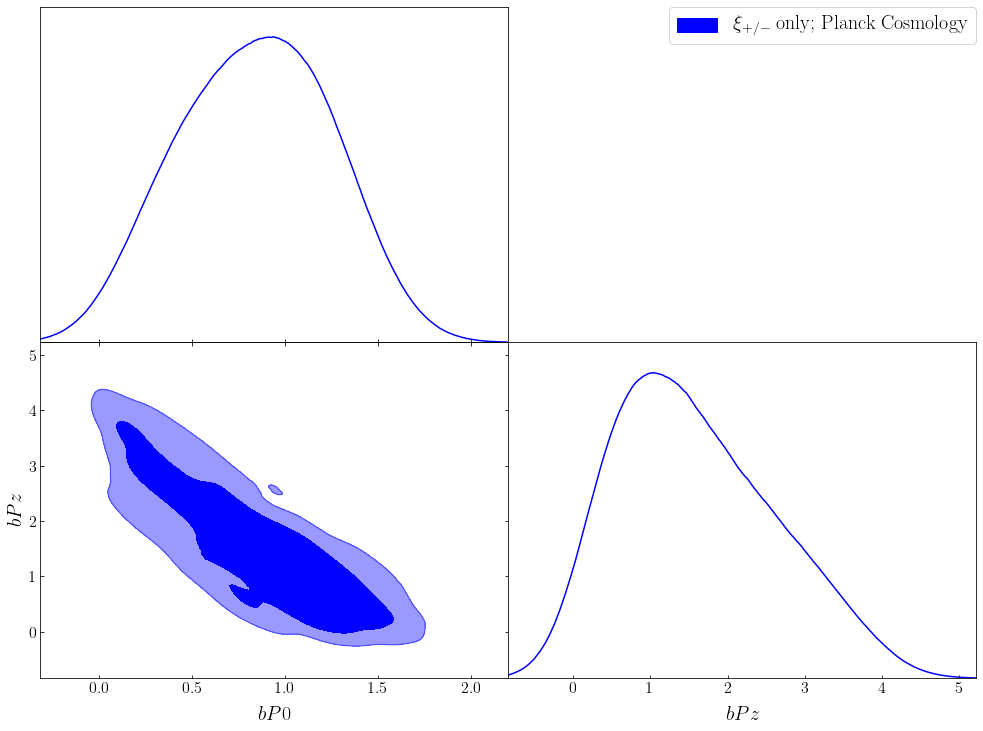

In [12]:
filename_list = [
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_2hcuts_delz_m_bP_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_fidcuts_HM_delz_m_IA_al1_DEScosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_ACTonly_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt'
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_betaA_PLcosmo_finalrun.txt',        
]     

legend_labels = [r'$\xi_{+/-}$ only; Planck Cosmology',r'$\xi_{+/-}$ only; DES Cosmology','ACT only','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--bpz0':r'bP0', 'theory_yx--bpalpha':r'bPz',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






cosmological_parameters--omega_m: [0.32367803]
cosmological_parameters--sigma8_input: [0.81771847]
wl_photoz_errors--bias_1: [0.00899766]
wl_photoz_errors--bias_2: [0.00375501]
wl_photoz_errors--bias_3: [-0.01253769]
wl_photoz_errors--bias_4: [-0.02555716]
shear_calibration_parameters--m1: [-0.00129585]
shear_calibration_parameters--m2: [-0.02526559]
shear_calibration_parameters--m3: [-0.02383648]
shear_calibration_parameters--m4: [-0.02912592]
halo_model_parameters--a: [0.2751891]
halo_model_parameters--eta_0: [0.41947836]
theory_yx--p0-a_m--0: [23.22942551]
theory_yx--p0-alpha_z--0: [-3.36879604]
theory_yx--a_ia--0: [0.41843591]
theory_yx--eta_ia--0: [-1.80960198]
DATA_VECTOR--2PT_CHI2: [145.04830837]
prior: [23.14583761]
like: [-72.52415419]
post: [-49.37831658]
weight: [0.00115807]
Removed no burn in
nsamp  =  1146
data shape =  (1146, 8)
weights shape =  (1146,)
param names =  ['cosmological_parameters--omega_m'
 'cosmological_parameters--sigma8_input' 'halo_model_parameters--a'
 

<Figure size 1008x756 with 0 Axes>

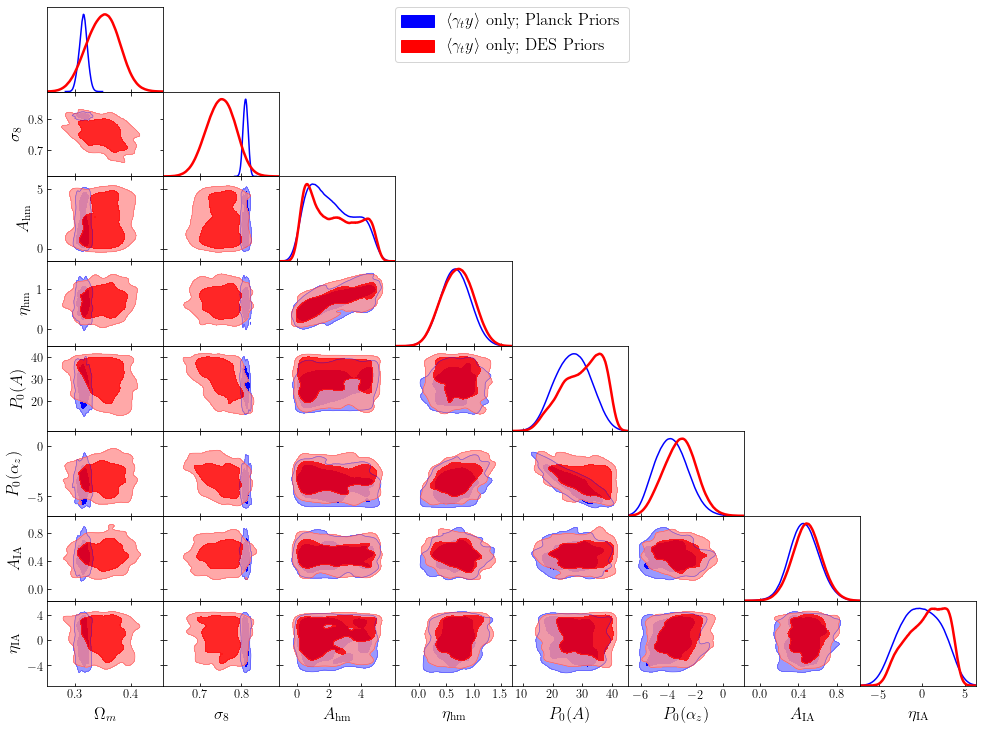

In [46]:
filename_list = [
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_al1_varycosmo_PLpriors_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt',
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_al1_varycosmo_DESpriors_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_ACTonly_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt'
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_betaA_PLcosmo_finalrun.txt',        
]     

legend_labels = [r'$\langle \gamma_t y \rangle$ only; Planck Priors',r'$\langle \gamma_t y \rangle$ only; DES Priors','ACT only','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {
    'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--sigma8_input':r'$\sigma_8$',
    'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






144.89638513070008
Removed no burn in
nsamp  =  1131
81.5186979836967
Removed no burn in
nsamp  =  952


58.60924706804127
Removed no burn in
nsamp  =  1110


<Figure size 1008x756 with 0 Axes>

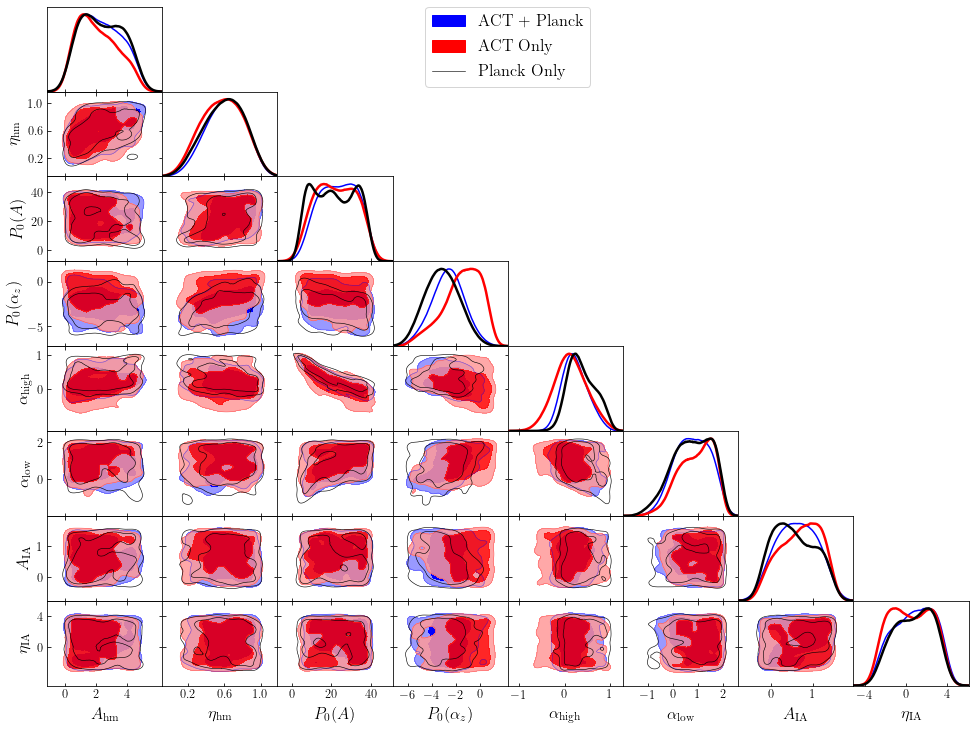

In [60]:
ldir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/'
filename_list = [
    ldir + 'chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.txt',
    ldir + 'chain_gtyACTonly_only_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.txt',
    ldir + 'chain_gtyPLonly_only_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.txt'
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_ACTonly_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt'
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_betaA_PLcosmo_finalrun.txt',        
]     

# legend_labels = [r'$\langle \gamma_t y \rangle$ only; Planck Cosmology',r'$\langle \gamma_t y \rangle$ only; DES Cosmology','ACT only','Polychord']
legend_labels = [r'ACT + Planck',r'ACT Only',r'Planck Only','ACT only','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
    print(np.amin(likef))
#     for jp in range(len(param_names)):
#         print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
#     print("data shape = ", data.shape)
#     print( "weights shape = ", weights.shape)
#     print( "param names = ", param_names)
#     print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






145.1109475392814
Removed no burn in
nsamp  =  1029
82.03790961108352
Removed no burn in
nsamp  =  820


58.309544201399525
Removed no burn in
nsamp  =  1000


<Figure size 1008x756 with 0 Axes>

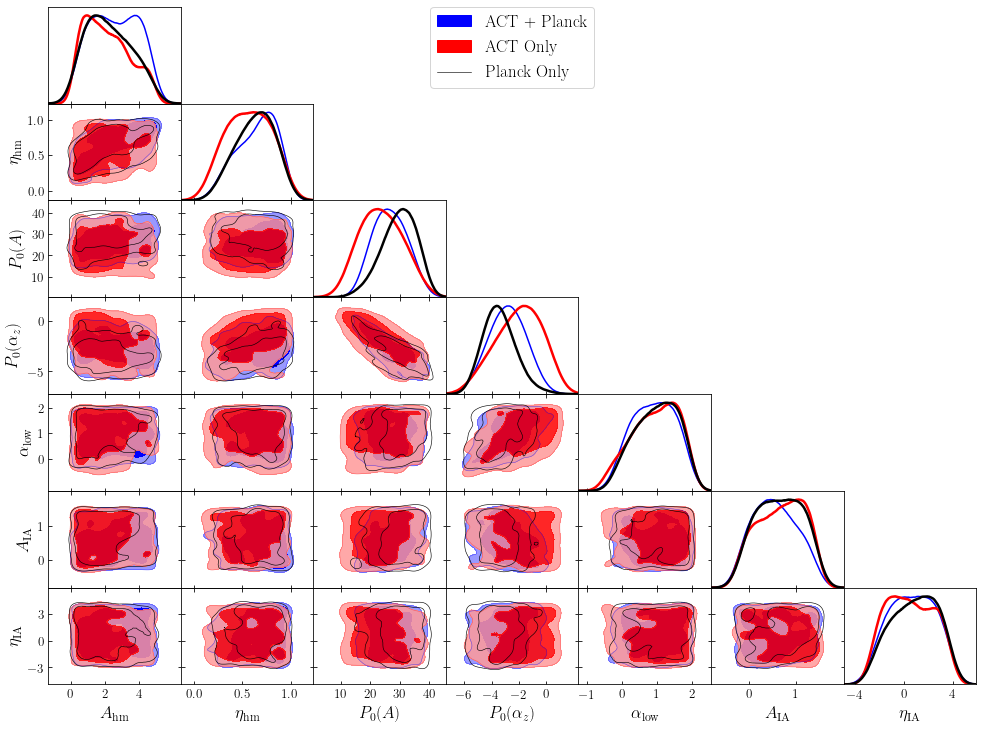

In [61]:
ldir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/'
filename_list = [
    ldir + 'chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_alphigh_highbpl_al1_PLcosmo_finalrun3.txt',
    ldir + 'chain_gtyACTonly_only_fidcuts_HM_delz_m_IA_P0A_P0z_alphigh_highbpl_al1_PLcosmo_finalrun3.txt',
    ldir + 'chain_gtyPLonly_only_fidcuts_HM_delz_m_IA_P0A_P0z_alphigh_highbpl_al1_PLcosmo_finalrun3.txt'
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_ACTonly_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt'
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_betaA_PLcosmo_finalrun.txt',        
]     

# legend_labels = [r'$\langle \gamma_t y \rangle$ only; Planck Cosmology',r'$\langle \gamma_t y \rangle$ only; DES Cosmology','ACT only','Polychord']
legend_labels = [r'ACT + Planck',r'ACT Only',r'Planck Only','ACT only','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha^{\rm break}_m$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
    print(np.amin(likef))
#     for jp in range(len(param_names)):
#         print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
#     print("data shape = ", data.shape)
#     print( "weights shape = ", weights.shape)
#     print( "param names = ", param_names)
#     print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






144.9456569604048
Removed no burn in
nsamp  =  1288
82.1173416654276
Removed no burn in
nsamp  =  989


58.776032561910995
Removed no burn in
nsamp  =  1186


<Figure size 576x432 with 0 Axes>

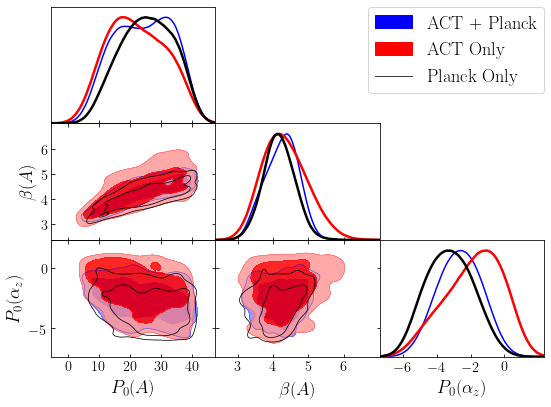

In [14]:
ldir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/'
filename_list = [
    ldir + 'chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.txt',
    ldir + 'chain_gtyACTonly_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.txt',
    ldir + 'chain_gtyPLonly_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.txt'
]     

# legend_labels = [r'$\langle \gamma_t y \rangle$ only; Planck Cosmology',r'$\langle \gamma_t y \rangle$ only; DES Cosmology','ACT only','Polychord']
legend_labels = [r'ACT + Planck',r'ACT Only',r'Planck Only','ACT only','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


# fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
#                     'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
#                     'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha^{\rm break}_m$',  
#                     'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
#                    'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
#                    'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
#                    'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
#                    'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'} 
fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
#                     'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
#                     'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha^{\rm break}_m$',  
#                     'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
#                    'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
#                    'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
#                    'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
#                    'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'
                   } 


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
    print(np.amin(likef))
#     for jp in range(len(param_names)):
#         print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
#     print("data shape = ", data.shape)
#     print( "weights shape = ", weights.shape)
#     print( "param names = ", param_names)
#     print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =8)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  
g.export(fname='compare_pressure_profile_gtyonly_P0A_P0z_betaA_alphigh.pdf')
# g.export(fname = 'compare_pressure_profile_gtyonly_.pdf')






wl_photoz_errors--bias_1: [0.00419724]
wl_photoz_errors--bias_2: [-0.02087137]
wl_photoz_errors--bias_3: [-0.02467438]
wl_photoz_errors--bias_4: [0.002063]
shear_calibration_parameters--m1: [-0.00231437]
shear_calibration_parameters--m2: [-0.02718001]
shear_calibration_parameters--m3: [-0.0202142]
shear_calibration_parameters--m4: [-0.03513436]
halo_model_parameters--a: [1.19074214]
halo_model_parameters--eta_0: [0.54488562]
theory_yx--p0-a_m--0: [33.77210578]
theory_yx--beta-a_m--0: [4.44169048]
theory_yx--p0-alpha_z--0: [-3.88063181]
theory_yx--alpha_p_high--0: [0.44281386]
theory_yx--a_ia--0: [1.06629265]
theory_yx--eta_ia--0: [1.20663509]
DATA_VECTOR--2PT_CHI2: [144.94565696]
prior: [11.77321533]
like: [-72.47282848]
post: [-60.69961315]
weight: [0.00105268]
Removed no burn in
nsamp  =  1288
data shape =  (1288, 8)
weights shape =  (1288,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--beta-a_m--0'
 'theory_yx--p0-alpha


theory_yx--p0-alpha_z--0: [-2.6378683]
theory_yx--alpha_p_high--0: [0.43182571]
theory_yx--a_ia--0: [0.59710043]
theory_yx--eta_ia--0: [2.34738938]
DATA_VECTOR--2PT_CHI2: [144.98568567]
prior: [9.92591715]
like: [-72.49284284]
post: [-62.56692569]
weight: [0.00109457]
Removed no burn in
nsamp  =  1248
data shape =  (1248, 8)
weights shape =  (1248,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--beta-a_m--0'
 'theory_yx--p0-alpha_z--0' 'theory_yx--alpha_p_high--0'
 'theory_yx--a_ia--0' 'theory_yx--eta_ia--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$P_0(A)$' '$\\beta(A)$'
 '$P_0(\\alpha_z)$' '$\\alpha^{\\rm break}_m$' '$A_{\\rm IA}$'
 '$\\eta_{\\rm IA}$']


<Figure size 1008x756 with 0 Axes>

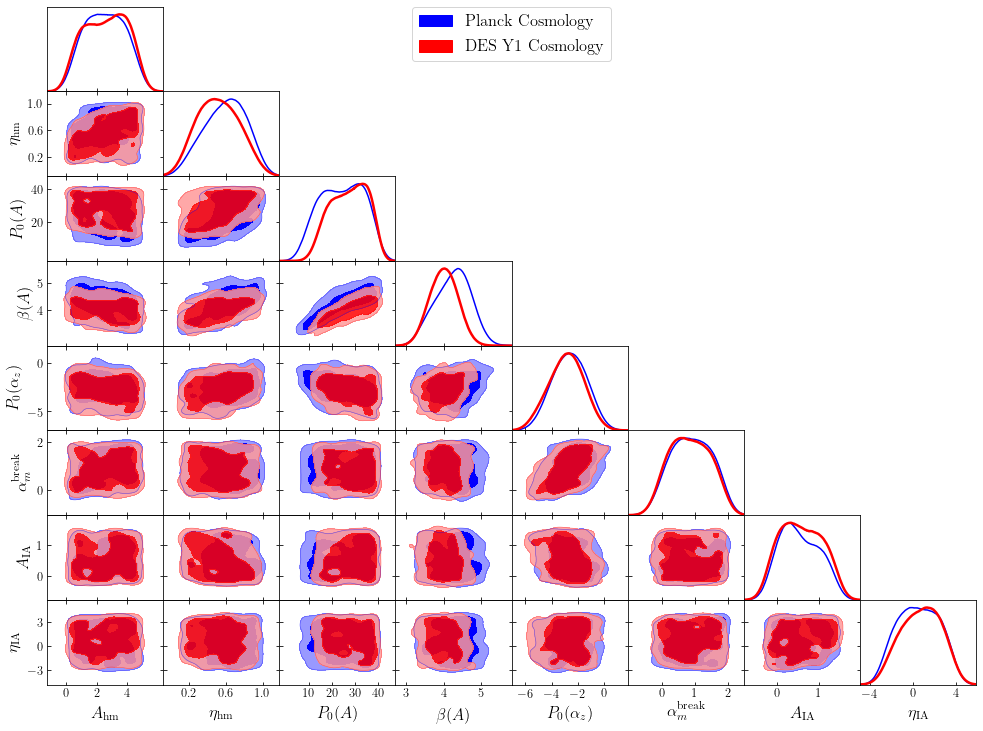

In [90]:
ldir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/'
filename_list = [
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt',
    ldir + 'chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.txt',
    ldir + 'chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_DESy1cosmo_finalrun3.txt'
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_ACTonly_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt'
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_betaA_PLcosmo_finalrun.txt',        
]     

legend_labels = [r'Planck Cosmology',r'DES Y1 Cosmology','ACT only','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha^{\rm break}_m$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  
 


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

g.export(fname='compare_pressure_profile_cosmology.pdf')






wl_photoz_errors--bias_1: [0.00505599]
wl_photoz_errors--bias_2: [0.0024707]
wl_photoz_errors--bias_3: [-0.00168386]
wl_photoz_errors--bias_4: [0.00172574]
shear_calibration_parameters--m1: [-0.00515833]
shear_calibration_parameters--m2: [-0.01830948]
shear_calibration_parameters--m3: [-0.03008899]
shear_calibration_parameters--m4: [-0.0375052]
halo_model_parameters--a: [0.70320955]
halo_model_parameters--eta_0: [0.32639116]
theory_yx--p0-a_m--0: [30.30847873]
theory_yx--p0-alpha_z--0: [-4.92024131]
theory_yx--a_ia--0: [0.87232148]
theory_yx--eta_ia--0: [1.25410688]
DATA_VECTOR--2PT_CHI2: [145.6679289]
prior: [18.76119456]
like: [-72.83396445]
post: [-54.07276989]
weight: [0.00081348]
Removed no burn in
nsamp  =  1020
data shape =  (1020, 6)
weights shape =  (1020,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--p0-alpha_z--0' 'theory_yx--a_ia--0'
 'theory_yx--eta_ia--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm 

<Figure size 1008x756 with 0 Axes>

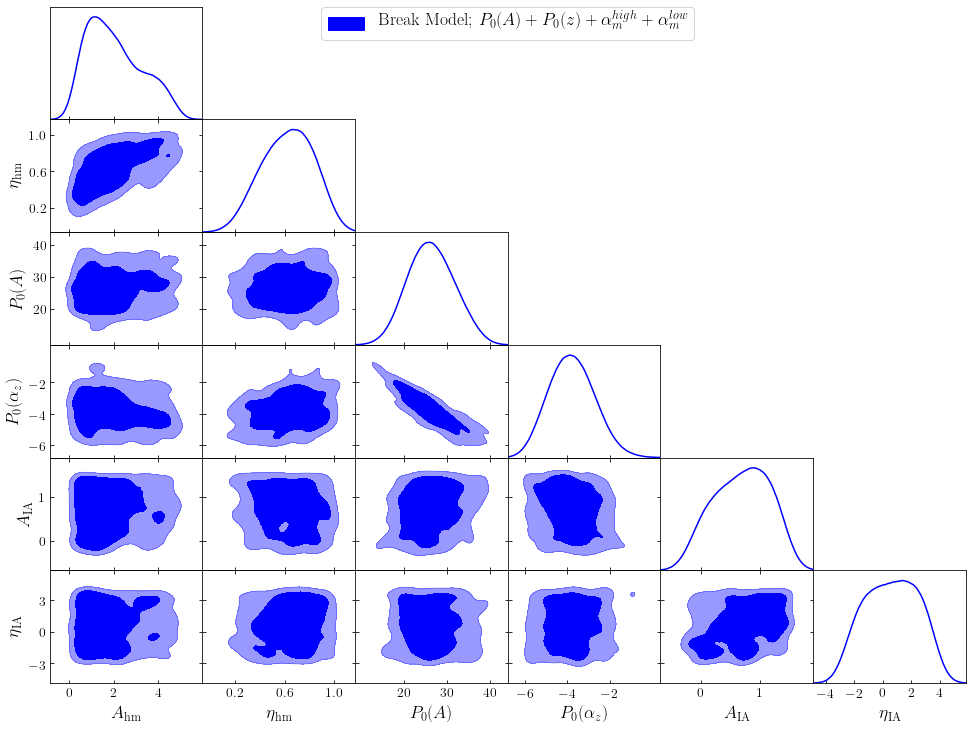

In [77]:
filename_list = [
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.txt',  
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_y3cuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_y3cuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt'
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_betaA_PLcosmo_finalrun.txt',        
]     

# legend_labels = [r'$\langle \gamma_t y \rangle$ only',r'$\xi_{+} + \xi_{-}$ only',r'$\langle \gamma_t y \rangle + \xi_{+} + \xi_{-} $','Polychord']
legend_labels = [r'Break Model; $P_0(A) + P_0(z) + \alpha^{high}_m + \alpha^{low}_m$',r'Simple Model; $P_0(A) + P_0(z)$',r'$\langle \gamma_t y \rangle + \xi_{+} + \xi_{-} $','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
#     likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    likef = np.loadtxt(filename)[-nsample:,-2]*-1
    ind_max = np.where(likef == np.amin(likef))[0]
    
    
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






In [16]:
490/441


1.1111111111111112

In [17]:
np.sqrt(2/430)


0.06819943394704735

In [95]:
np.logspace(np.log10(2.5),np.log10(250),20)


array([  2.5       ,   3.18568746,   4.05944185,   5.1728452 ,
         6.59162725,   8.39954572,  10.703331  ,  13.63898695,
        17.3798199 ,  22.14666976,  28.22094729,  35.96124721,
        45.82451777,  58.39303673,  74.40878604,  94.81725477,
       120.82325596, 153.96205277, 196.18999259, 250.        ])

wl_photoz_errors--bias_1: [0.02963805]
wl_photoz_errors--bias_2: [-0.00448513]
wl_photoz_errors--bias_3: [-9.27789467e-05]
wl_photoz_errors--bias_4: [-0.01380015]
shear_calibration_parameters--m1: [-0.00728382]
shear_calibration_parameters--m2: [-0.01316761]
shear_calibration_parameters--m3: [-0.02108261]
shear_calibration_parameters--m4: [-0.03104418]
halo_model_parameters--a: [0.97430338]
halo_model_parameters--eta_0: [0.16046908]
theory_yx--hydro_mb--1: [2.67026942]
theory_yx--hydro_mb--2: [2.40012154]
theory_yx--hydro_mb--3: [2.42926091]
theory_yx--hydro_mb--4: [2.37269428]
theory_yx--a_ia--0: [-0.11128299]
theory_yx--eta_ia--0: [-2.37379365]
DATA_VECTOR--2PT_CHI2: [522.1081938]
prior: [19.93040703]
like: [-261.0540969]
post: [-241.12368988]
weight: [0.00199119]
Removed no burn in
nsamp  =  1935
data shape =  (1935, 8)
weights shape =  (1935,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--hydro_mb--1' 'theory_yx--hydro_mb--2'
 'theory_yx--hy

wl_photoz_errors--bias_1: [-0.00114976]
wl_photoz_errors--bias_2: [-0.01133264]
wl_photoz_errors--bias_3: [0.00686325]
wl_photoz_errors--bias_4: [0.00074258]
shear_calibration_parameters--m1: [-0.01704281]
shear_calibration_parameters--m2: [-0.01637388]
shear_calibration_parameters--m3: [-0.00530252]
shear_calibration_parameters--m4: [-0.016876]
halo_model_parameters--a: [1.04076922]
halo_model_parameters--eta_0: [0.13270572]
theory_yx--hydro_mb--0: [1.83586037]
theory_yx--a_ia--0: [-0.28953051]
theory_yx--eta_ia--0: [-2.90916842]
DATA_VECTOR--2PT_CHI2: [570.2382085]
prior: [16.3605939]
like: [-285.11910425]
post: [-268.75851035]
weight: [0.00329957]
Removed no burn in
nsamp  =  2610
data shape =  (2610, 5)
weights shape =  (2610,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--hydro_mb--0' 'theory_yx--a_ia--0' 'theory_yx--eta_ia--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$B$' '$A_{\\rm IA}$'
 '$\\eta_{\\rm IA}$']


<Figure size 1008x756 with 0 Axes>

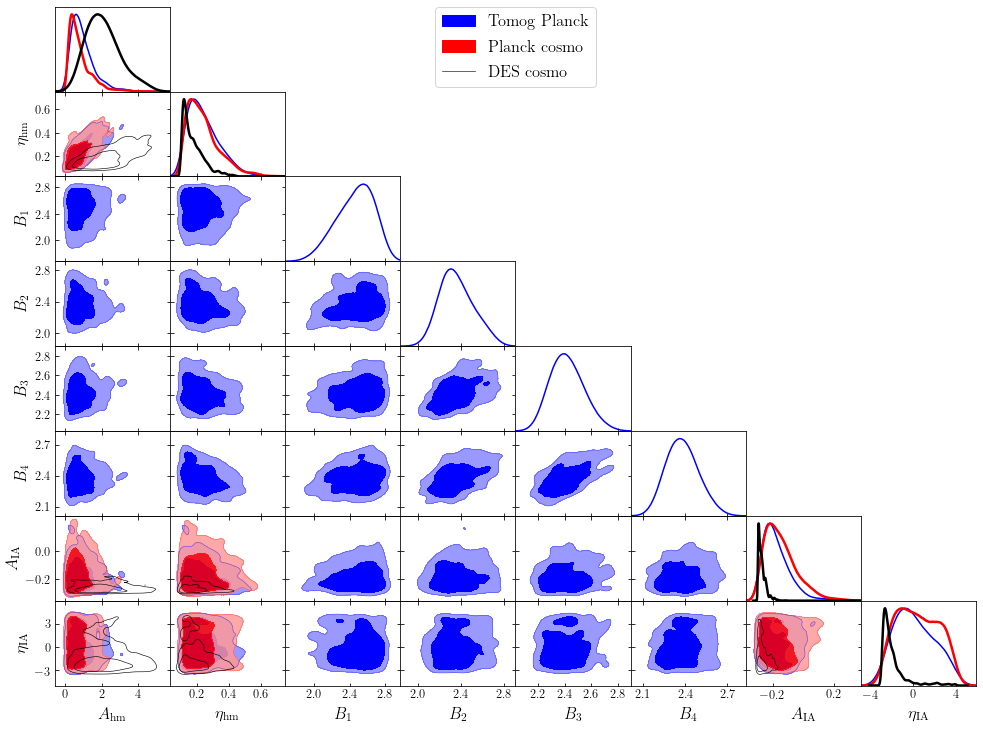

In [11]:
filename_list = [
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1h2h_PLcosmo_finalrun.txt',
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt'
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_xip_xim_fidcuts_HM_delz_m_IA_tomoBhse_al1_PLcosmo_corr_finalrun3.txt',
'/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_xip_xim_fidcuts_HM_delz_m_IA_Bhse_al1_PLcosmo_wide_finalrun3.txt' ,
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_xip_xim_fidcuts_HM_delz_m_IA_Bhse_al1_DEScosmo_finalrun3.txt' 
]     

legend_labels = ['Tomog Planck','Planck cosmo','DES cosmo','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--beta--0':r'$\beta$'	,'theory_yx--hydro_mb--0':r'$B$',
                    'theory_yx--hydro_mb--1':r'$B_1$','theory_yx--hydro_mb--2':r'$B_2$','theory_yx--hydro_mb--3':r'$B_3$',
                    'theory_yx--hydro_mb--4':r'$B_4$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = np.loadtxt(filename)[-nsample:,-5]
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






(1680, 1) (1680, 21)
(1680, 22)
Removed no burn in
(1680, 1) (1680, 21)
(1680, 22)
Removed no burn in


(1680, 1) (1680, 21)
(1680, 22)
Removed no burn in
(1680, 1) (1680, 21)
(1680, 22)
Removed no burn in
Removed no burn in


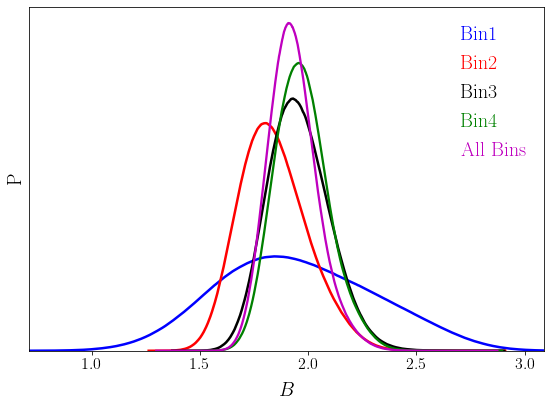

In [27]:
filename_list = [
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_tomoBhse_al1_PLcosmo_corr_finalrun3.txt',
        '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_tomoBhse_al1_PLcosmo_corr_finalrun3.txt',
        '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_tomoBhse_al1_PLcosmo_corr_finalrun3.txt',
        '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_tomoBhse_al1_PLcosmo_corr_finalrun3.txt',
'/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_fidcuts_HM_delz_m_IA_Bhse_al1_PLcosmo_wide_finalrun3.txt' ,
]     

legend_labels = ['Tomog Planck','Planck cosmo','DES cosmo','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {
    'theory_yx--hydro_mb--0':r'$B$',
#                     'theory_yx--hydro_mb--1':r'$B_1$','theory_yx--hydro_mb--2':r'$B_2$','theory_yx--hydro_mb--3':r'$B_3$',
#                     'theory_yx--hydro_mb--4':r'$B_4$',

                   }  



for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    if fi < 4:
        ind_fi = np.where(param_names == 'theory_yx--hydro_mb--' + str(fi+1))            
        s8 = data[:,ind_fi][:,0,:]
        print(s8.shape,data.shape)
        data = np.hstack((data,s8))
        print(data.shape)
        param_names = np.append(param_names,'theory_yx--hydro_mb--0')    
    
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
#     likef = np.loadtxt(filename)[-nsample:,-5]
#     ind_max = np.where(likef == np.amin(likef))[0]
#     if len(ind_max) > 1:
#         ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
#     for jp in range(len(param_names)):
#         print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy


        
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

#     print("nsamp  = ", nsample)
#     print("data shape = ", data.shape)
#     print( "weights shape = ", weights.shape)
#     print( "param names = ", param_names)
#     print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =8)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
g.plot_1d(all_samples,'theory_yx--hydro_mb--0',normalized=True, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  
g.add_legend(['Bin1', 'Bin2','Bin3','Bin4','All Bins'], colored_text=True);
g.export(fname = 'mass_bias_evolution_gtyonly.pdf')






Removed no burn in
theory_yx--hydro_mb--0: 1.18165467189232, 1.4287408522365446, 1.5726837049027742
theory_yx--rho_mb--0: 0.9352625635256873, 1.5838000019715393, 2.3924033937693805
Removed no burn in
theory_yx--hydro_mb--0: 1.8062648725265005, 1.9286847156160032, 2.0261510709151977


/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/getdist/plots.py:1895: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  self.legend = self.fig.legend(lines, legend_labels, loc=legend_loc, **args)


<Figure size 576x432 with 0 Axes>

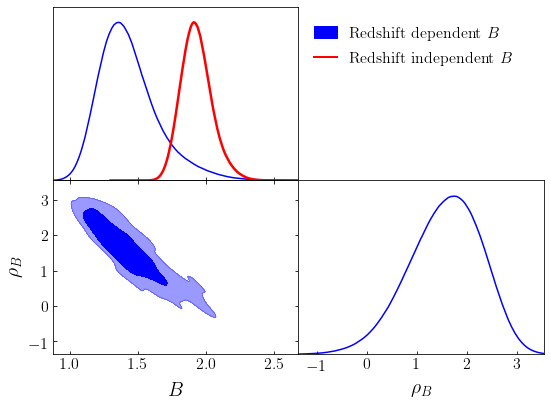

In [42]:
filename_list = [
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_fidcuts_HM_delz_m_IA_Bhse_rhoBhse_al1_PLcosmo_wide_finalrun3.txt',
'/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_fidcuts_HM_delz_m_IA_Bhse_al1_PLcosmo_wide_finalrun3.txt' ,
]     

legend_labels = [r'Redshift dependent $B$',r'Redshift Independent $B$']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []
import matplotlib.patches    as mpatches

fancy_dictionary = {
    'theory_yx--hydro_mb--0':r'$B$','theory_yx--rho_mb--0':r'$\rho_{B}$',
#                     'theory_yx--hydro_mb--1':r'$B_1$','theory_yx--hydro_mb--2':r'$B_2$','theory_yx--hydro_mb--3':r'$B_3$',
#                     'theory_yx--hydro_mb--4':r'$B_4$',

                   }  



for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
#     if fi < 4:
#         ind_fi = np.where(param_names == 'theory_yx--hydro_mb--' + str(fi+1))            
#         s8 = data[:,ind_fi][:,0,:]
#         print(s8.shape,data.shape)
#         data = np.hstack((data,s8))
#         print(data.shape)
#         param_names = np.append(param_names,'theory_yx--hydro_mb--0')    
    
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
#     likef = np.loadtxt(filename)[-nsample:,-5]
#     ind_max = np.where(likef == np.amin(likef))[0]
#     if len(ind_max) > 1:
#         ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
#     for jp in range(len(param_names)):
#         print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy


        
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3},label=legend_labels[fi])
    all_samples.append(samples)
    marge = samples.getMargeStats()
    for param_name in param_names:
        r_marge = marge.parWithName(param_name)
        r_mean = r_marge.mean
        print(str(param_name) + ': ' + str(r_marge.limits[0].lower) + ', ' + str(r_marge.mean) + ', ' + str(r_marge.limits[0].upper))

fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =8)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# set the legend:
g.legend.remove()

leg_handlers = [ mpatches.Patch(color='blue'),
                 pl.Line2D((0,1),(0,0), color='red', lw=2.0, ls='-'  ) ]
legend_labels = [r'Redshift dependent $B$',r'Redshift independent $B$']

# legend for the second plot:
leg = g.fig.legend(handles  = leg_handlers,
                   labels   = legend_labels,
                   fontsize = 16, frameon   = False,
                   fancybox = False, edgecolor = 'k', ncol = 1,
                   borderaxespad = 0.0, columnspacing = 2.0, handlelength = 1.4,
                   loc = 'upper right',
                   bbox_to_anchor=( 0.0,0.0,0.9,0.9),
                 )
leg.get_frame().set_linewidth('0.8')
leg._legend_box.align = 'left'

# g.plot_1d(all_samples,'theory_yx--hydro_mb--0',normalized=True, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  
# g.add_legend(['Bin1', 'Bin2','Bin3','Bin4','All Bins']);
g.export(fname = 'mass_bias_evolution_gtyonly_B_rhoB.pdf')






In [55]:
-(1 - 1/1.1816) + 0.3

0.14631008801624917

wl_photoz_errors--bias_1: [0.01222497]
wl_photoz_errors--bias_2: [-0.01863484]
wl_photoz_errors--bias_3: [-0.00948875]
wl_photoz_errors--bias_4: [0.00805604]
shear_calibration_parameters--m1: [-0.02759476]
shear_calibration_parameters--m2: [-0.00803997]
shear_calibration_parameters--m3: [-0.02646079]
shear_calibration_parameters--m4: [-0.04473906]
halo_model_parameters--a: [0.26717469]
halo_model_parameters--eta_0: [0.70830269]
theory_yx--hydro_mb--1: [1.65955331]
theory_yx--hydro_mb--2: [1.66628405]
theory_yx--hydro_mb--3: [1.78777126]
theory_yx--hydro_mb--4: [1.87085567]
theory_yx--a_ia--0: [1.03537303]
theory_yx--eta_ia--0: [-0.14532051]
DATA_VECTOR--2PT_CHI2: [146.0449741]
prior: [16.46180192]
like: [-73.02248705]
post: [-56.56068513]
weight: [0.00148657]
Removed no burn in
nsamp  =  1680
data shape =  (1680, 8)
weights shape =  (1680,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--hydro_mb--1' 'theory_yx--hydro_mb--2'
 'theory_yx--hydro_mb-

<Figure size 1008x756 with 0 Axes>

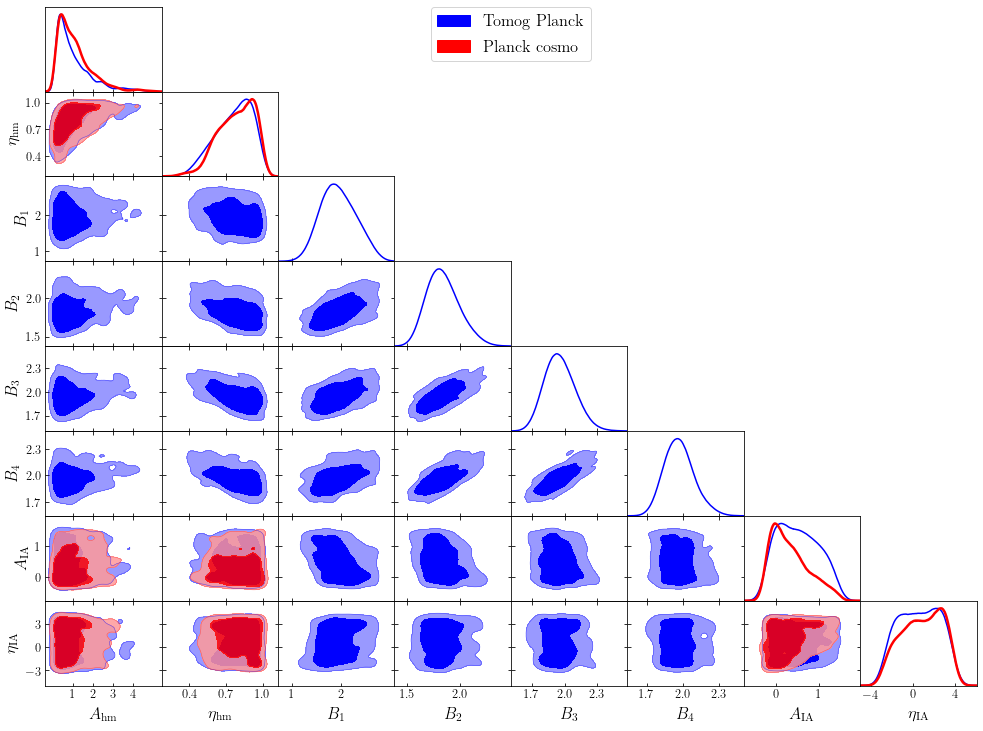

In [4]:
filename_list = [
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1h2h_PLcosmo_finalrun.txt',
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt'
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_tomoBhse_al1_PLcosmo_corr_finalrun3.txt',
'/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_fidcuts_HM_delz_m_IA_Bhse_al1_PLcosmo_wide_finalrun3.txt' ,
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_xip_xim_fidcuts_HM_delz_m_IA_Bhse_al1_DEScosmo_finalrun3.txt' 
]     

legend_labels = ['Tomog Planck','Planck cosmo','DES cosmo','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--beta--0':r'$\beta$'	,'theory_yx--hydro_mb--0':r'$B$',
                    'theory_yx--hydro_mb--1':r'$B_1$','theory_yx--hydro_mb--2':r'$B_2$','theory_yx--hydro_mb--3':r'$B_3$',
                    'theory_yx--hydro_mb--4':r'$B_4$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = np.loadtxt(filename)[-nsample:,-5]
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






In [20]:
import copy
def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
    return param_names


def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def get_nvar(filename):
    with open(filename, "r") as fi:
        for ln in fi:
            if ln.startswith("#n_varied="):
                nvar = int(ln[10:12])
    return nvar


def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
#     print param_names
    return param_names

def create_values_file(first_line,bestfit_values_all,savefile_name,bias_name,chi2_vals=None,fix_cosmo=False, nvar_tot = None,bias_section_name=None):
    first_line_split = first_line.split()

    first_line_split_cut = first_line_split
    bestfit_values_all_cut = bestfit_values_all

    first_element_split = list(first_line_split_cut[0])
    first_line_split_cut[0] = ''.join(first_element_split[1:])
    first_line_split_cut = first_line_split_cut[:nvar_tot]

    section_param_dict = {}
    bestfit_param_dict = {}

    bins_in_bestfit = []

    k = 0
    
    for j in range(len(first_line_split_cut)):
        ln = list(first_line_split_cut[j])
        ln_cut_ind = ln.index('-')
        section_name = ''.join(ln[:ln_cut_ind])
        vary_param_name_split = ln[ln_cut_ind + 2:]
        vary_param_name = ''.join(vary_param_name_split)
        print(section_name, vary_param_name)
        if section_name in section_param_dict.keys():
            current_param_array = copy.deepcopy(section_param_dict[section_name])
            current_param_array.append(vary_param_name)
            section_param_dict[section_name] = current_param_array
            bestfit_param_array = copy.deepcopy(bestfit_param_dict[section_name])
            bestfit_param = bestfit_values_all_cut[k]
            bestfit_param_array.append(bestfit_param)
            bestfit_param_dict[section_name] = bestfit_param_array
        else:
            section_param_dict[section_name] = [vary_param_name]
            bestfit_param = bestfit_values_all_cut[k]
            bestfit_param_dict[section_name] = [bestfit_param]
        k += 1

    section_names = list(section_param_dict.keys())
    f = open(savefile_name,'w')
    
    for j in range(len(section_names)):
        f.write('[' + section_names[j] + ']' + '\n')
        param_vary_names = section_param_dict[section_names[j]]
        param_vary_vals = bestfit_param_dict[section_names[j]]

        for i in range(len(param_vary_names)):
            f.write(param_vary_names[i] + '=' + str(param_vary_vals[i]) + '\n')
        

    f.close()

    return 0






In [22]:
ldir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/'
# ldir = '/global/cfs/cdirs/des/data_actxdes/'
# filename = ldir + 'chain_sz_shear_planckacty3_gtyonly_b12_p0am_wz_sc_gtyfid_wide_emcee.txt'
# filename = ldir + 'chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1h2h_PLcosmo_finalrun.txt'
filename = ldir + 'chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.txt'
sdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/values/'
bestfit_file_name = sdir + 'MAP_values_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.ini'  
infile = open(filename, 'r')
first_line = infile.readline()
nsample = np.loadtxt(filename).shape[0]
data = np.loadtxt(filename)[-nsample:,:-2]
# nsample = get_nsample(filename)
like_file = np.loadtxt(filename)[-nsample:,-2]
lnlike_max = np.amax(like_file)
ind_max = np.where(like_file == lnlike_max)[0][0]
print(ind_max,nsample)
print(lnlike_max)

bestfit_values = data[ind_max,:]
create_values_file(first_line, bestfit_values, bestfit_file_name, None, chi2_vals=None,fix_cosmo=True, nvar_tot = 16,bias_section_name='pk_to_cl') 






1264 1288
-57.6304675142346
wl_photoz_errors bias_1
wl_photoz_errors bias_2
wl_photoz_errors bias_3
wl_photoz_errors bias_4
shear_calibration_parameters m1
shear_calibration_parameters m2
shear_calibration_parameters m3
shear_calibration_parameters m4
halo_model_parameters a
halo_model_parameters eta_0
theory_yx p0-a_m--0
theory_yx beta-a_m--0
theory_yx p0-alpha_z--0
theory_yx alpha_p_high--0
theory_yx a_ia--0
theory_yx eta_ia--0


0

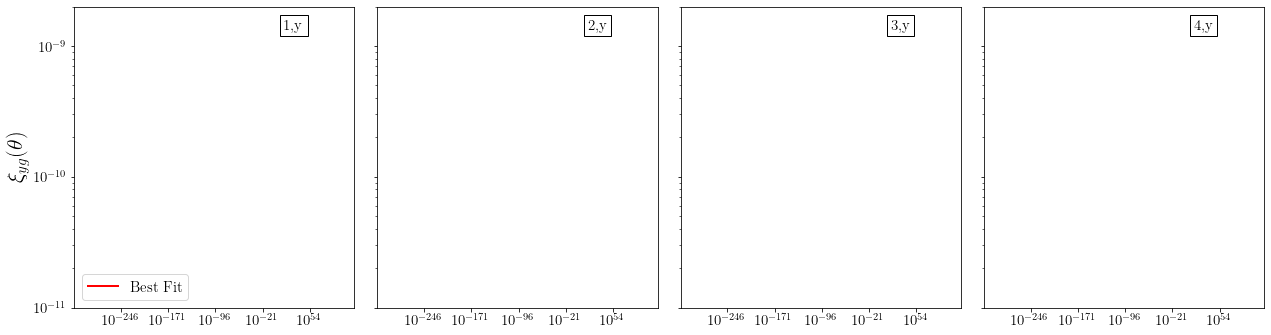

In [13]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
import scipy.interpolate as interpolate
ytype = 'planck'
# ytype = 'act'
do_residuals = 0



if ytype == 'planck':
    fnames = [
#         'DV_obj_temp_kk_gty_planck_act_y3_run1_b12_p0am_sc_gtyfid_xipxim_all_wide.pk', 
#         'DV_obj_temp_kk_gty_planck_act_gtyonly_saveDV.pk'
#         'DV_obj_temp_kk_gty_planck_act_p0am_wz_beamed_B12_saveDV_MAP.pk'
        'DV_obj_temp_all_halos_hy_hres.pk'
    ]
    yt = 1
    
    
labels = ['Best Fit','OWLS Ref','OWLS AGN']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')


for j2 in range(4):
    for jf in range(len(fnames)):

        DV = dill.load(open(fdir + fnames[jf],'rb'))  

        jc = 0
        texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
        texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
        bin_str = 'bin_' + str(j2+1) + '_' + str(0)

        theta_array = DV.xi_result_dict['gy']['theta']
        Cl_j1_tot = DV.xi_result_dict['gy'][bin_str]['tot']

#         theta_array = DV.Cl_result_dict['l_array']
#         Cl_j1_tot = DV.Cl_result_dict['gy'][bin_str]['tot']
        
        
        ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  


#         ax[j2].axvspan(0,sc[j2],alpha=0.2,color='k')
        ax[j2].set_xscale('log')

#         if do_residuals:
#             ax[j2].set_ylim(ylims)        
#         else:
        ax[j2].set_yscale('log')
        ax[j2].set_ylim(1e-11,2e-9)


#         ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
#         ticks  = np.array([3,10,30,100])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[j2].set_xlim((2,250))
        ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

    # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
    if do_residuals:
        ax[0].set_ylabel(r'$\Delta \xi_{y\gamma_t}/\xi^{\rm bestfit}_{y\gamma_t}$ ', size = 22)
    else:
        ax[0].set_ylabel(r'$\xi_{yg}(\theta)$ ', size = 22)
    # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
    # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
    ax[0].legend(fontsize=15,loc='lower left')
#     ax[1].legend(fontsize=15,loc='lower left')
    #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_sims_residual_' + str(ytype) + '.pdf')






In [9]:
Cl_j1_tot 


array([ 5.05780322e-10,  5.05784228e-10,  5.05789144e-10,  5.05795334e-10,
        5.05803126e-10,  5.05812935e-10,  5.05825283e-10,  5.05840829e-10,
        5.05860399e-10,  5.05885035e-10,  5.05916047e-10,  5.05955087e-10,
        5.06004232e-10,  5.06066094e-10,  5.06143964e-10,  5.06241980e-10,
        5.06365350e-10,  5.06520623e-10,  5.06716039e-10,  5.06961953e-10,
        5.07271386e-10,  5.07660694e-10,  5.08150417e-10,  5.08766331e-10,
        5.09540755e-10,  5.10514172e-10,  5.11737224e-10,  5.13273137e-10,
        5.15200761e-10,  5.17618039e-10,  5.20646308e-10,  5.24435207e-10,
        5.29168211e-10,  5.35068733e-10,  5.42405897e-10,  5.51499888e-10,
        5.62725189e-10,  5.76507935e-10,  5.93316352e-10,  6.13636166e-10,
        6.37925889e-10,  6.66542587e-10,  6.99628459e-10,  7.36944760e-10,
        7.77656300e-10,  8.20067261e-10,  8.61312086e-10,  8.97071724e-10,
        9.21446266e-10,  9.28294749e-10,  9.09626027e-10,  8.61492043e-10,
        7.93545814e-10,  

In [96]:
from astropy.io import fits
DVout = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/y3-3x2pt/data/des-y3/2pt_NG_final_2ptunblind_11_13_20_wnz.fits')  

cov = DVout['COVMAT'].data


In [101]:
cov_new_xipxim = cov[0:400,0:400]

DVorig = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov_updatedcov_finalrun3.fits')  
cov_orig = DVorig['COVMAT'].data

cov_old_xipxim = cov_orig[0:400,0:400]



In [102]:
(cov_new_xipxim - cov_old_xipxim)/cov_old_xipxim
 
 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:

with fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov_updatedcov_finalrun3.fits', mode='update') as hdul:
    cov_orig = DVorig['COVMAT'].data
    cov_orig[0:400,0:400] = cov_new_xipxim
    hdul['COVMAT'].data = cov_orig
    hdul.flush()
    
    

In [43]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
percentiles = [16.0, 84.0]

colors = ['blue']
alpha_list = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2]
labels = [r'Data']
linestyles = ['-']

DV1 = dill.load(open(fdir + 'DV_wyy_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
DV2 = dill.load(open(fdir + 'DV_wyy_fid_B12.pk','rb'))  






In [7]:
# DV1.Cl_result_dict.keys()
pl1 = np.loadtxt('planck_yy_fig18_central.txt', delimiter=',')
pl2 = np.loadtxt('planck_yy_fig18_lowerlim.txt', delimiter=',')
pl3 = np.loadtxt('planck_yy_fig18_upperlim.txt', delimiter=',')
ell_pl = pl1[:,0]
Dl_pl = pl1[:,1]*1e-12
err_high_pl = pl2[:,1]*1e-12 - Dl_pl
err_low_pl = Dl_pl - pl3[:,1]*1e-12



In [8]:
df1 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/Clyy_plot_data_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))   



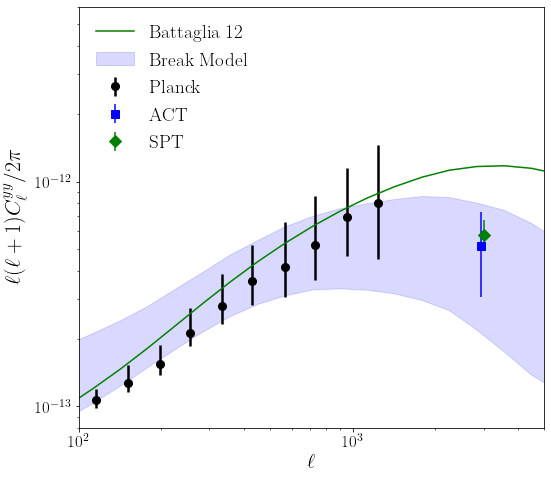

In [15]:
fig, ax = pl.subplots(1, 1, figsize=(8, 7))
# ell = DV1.Cl_result_dict['l_array']
# ax.plot(ell, (1./(2*np.pi))*(ell)*(ell+1) * DV2.Cl_result_dict['yy']['bin_0_0']['tot'], color='green', alpha=1.0, lw=2.5, label = 'Battaglia 12')
# ax.plot(ell, (1./(2*np.pi))*(ell)*(ell+1) * DV1.Cl_result_dict['yy']['bin_0_0']['tot'], color='black', alpha=1.0, lw=2.5,label = 'BestFit')
scaling = df1['l'] * (df1['l'] + 1) * (1./(2*np.pi))
ax.errorbar(ell_pl, Dl_pl,np.array([err_low_pl,err_high_pl]), color='black',ls='',marker='o', ms=8.0, alpha=1.0, lw=2.5,label = 'Planck')
vljv = 0.51819e-12
ax.errorbar([2928.3],[vljv],np.array([[vljv-0.3078e-12,0.7332e-12 - vljv]]).T,ls='',marker='s',ms='8',color='blue',label='ACT')

vljv = 0.58116e-12
ax.errorbar([3024],[vljv],np.array([[vljv-0.4889e-12,0.676e-12 - vljv]]).T,ls='',marker='D',ms='8',color='green',label='SPT')


ax.fill_between(df1['l'], scaling * df1['Clyy_low'], scaling * df1['Clyy_high'], color='blue', alpha=0.15, label = 'Break Model')
ax.plot(df1['l'], scaling * df1['Clyy_fid'], color='g', alpha=1.0, label = 'Battaglia 12')
ax.set_xlabel(r'$\ell$', size=20)
ax.set_ylabel(r'$\ell (\ell+1) C^{yy}_{\ell}/2\pi$', size=22)
# ax.set_xlim(9,5e3) 
ax.set_xlim(1e2,5e3) 
ax.set_ylim(8e-14,6e-12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=17)
ax.tick_params(axis='both', which='minor', labelsize=17)


legend = ax.legend(fontsize=19, frameon=False, loc = 'upper left')
pl.tight_layout()
fig.savefig('Clyy_comp_gty_only_P0A_P0z_betaA_alphigh_highbpl_al1_PLcosmo_finalrun3.pdf')
# fig.savefig(save_plot_fname)


